# **Analysis of Corporate Clients Based on Sales Documents**

Prepared by: Anna Fischer and Boglárka Póra

## **Project Objectives:**


*   Exploration and transformation of available data into a model-ready format
*   Execution of RFM analysis
*   Creation of customer clusters
*   Proposal of strategies based on the results


## **Data Description:**



*   DocumentId: The sales document number, a unique identifier - text
*   PartnerId: The unique identifier of the commercial partner (client) - text
*   DocumentDate: The date of the sales document - date
*   City: The headquarters location of the commercial partner (client) - text
*   Sales: The value of the sales document (invoice) - numeric




## **Methodology:**


*   Exploratory Data Analysis (EDA)
*   RFM analysis
*   Clustering algorithms
*   Dimensionality reduction algorithms
*   Interactive visualization techniques




## **Importing Libraries and Selecting Color Palette**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
sns.set_style("whitegrid")
sns.set_palette("rocket")

In [3]:
sns.color_palette()

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

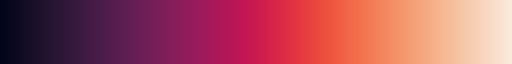

In [4]:
sns.color_palette("rocket", as_cmap = True)

In [5]:
palette = sns.color_palette()
c_palette = sns.color_palette("rocket", as_cmap = True)

## **Data Import**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_excel('/content/drive/MyDrive/Big Data Adatelemzes/data.xlsx')
data.head()

DocumentId  PartnerId DocumentDate                  City     Sales
0      822217        331   2022-09-27                BRASOV -79375.42
1      821727      12508   2022-08-01                   NaN  -4345.24
2      840424       8939   2022-12-20             TIMISOARA  -2952.60
3      758393       1098   2022-01-11  BUCURESTI SECTORUL 6  -2428.48
4      830027       7569   2022-10-28             TIMISOARA  -2205.90

In [8]:
# Or
#data = pd.read_excel('data.xlsx')
#data.head()

## **Data Exploration and Cleaning**

In [9]:
data.columns

Index(['DocumentId', 'PartnerId', 'DocumentDate', 'City', 'Sales'], dtype='object')

In [10]:
data.shape

(9818, 5)


As we can see, the dataset intended for analysis consists of 9,818 rows and 5 columns.

In [11]:
data.dtypes

DocumentId               int64
PartnerId                int64
DocumentDate    datetime64[ns]
City                    object
Sales                  float64
dtype: object

We can observe the data types of the dimensions. The presence of int, float, and datetime types indicates that there are no erroneous values in the dataset that would convert a column to object type. However, there might still be missing values.

In [12]:
data.describe()

DocumentId     PartnerId                   DocumentDate  \
count    9818.000000   9818.000000                           9818   
mean   799375.430739   6961.042575  2022-06-29 09:40:39.845182464   
min    756724.000000      4.000000            2022-01-03 00:00:00   
25%    776993.250000   1141.000000            2022-04-05 00:00:00   
50%    800005.000000   8191.000000            2022-06-30 00:00:00   
75%    821269.750000  10961.000000            2022-09-22 00:00:00   
max    843594.000000  12812.000000            2022-12-30 00:00:00   
std     25175.856289   4416.929374                            NaN   

              Sales  
count   9818.000000  
mean     829.039757  
min   -79375.420000  
25%      270.475000  
50%      588.165000  
75%     1027.402500  
max    24313.420000  
std     1446.307460

The DocumentId and PartnerId appear as numeric values, but these metrics do not hold meaningful significance for these variables. However, from this, we can easily observe that:

* The sales data covers the year 2022.
* There are also negative invoice values, as the minimum value across the entire dataset is -79,375.42.



In [13]:
data.duplicated().sum()

0

This indicates that there are no duplicate rows in the dataframe.

The next step is to systematically check each dimension for inappropriate values and clean them, or to fill in any missing values.

**DocumentId**

In [14]:
data['DocumentId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9818 entries, 0 to 9817
Series name: DocumentId
Non-Null Count  Dtype
--------------  -----
9818 non-null   int64
dtypes: int64(1)
memory usage: 76.8 KB


In [15]:
data['DocumentId'].nunique()

9818

There are as many unique values in this column as there are rows in the dataset, meaning there are no duplicate document IDs.

In [16]:
data['DocumentId'].isna().any()

False

None of the variable values are missing.

Since this is a unique identifier, we will not use it in the feature engineering process, as it does not provide additional information about the invoice record beyond identification.

**PartnerId**

In [17]:
data['PartnerId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9818 entries, 0 to 9817
Series name: PartnerId
Non-Null Count  Dtype
--------------  -----
9818 non-null   int64
dtypes: int64(1)
memory usage: 76.8 KB


In [18]:
data['PartnerId'].nunique()

814

We know that the company invoiced 814 different clients in 2022.

In [19]:
data['PartnerId'].isna().any()

False

No invoice was issued without specifying the client.

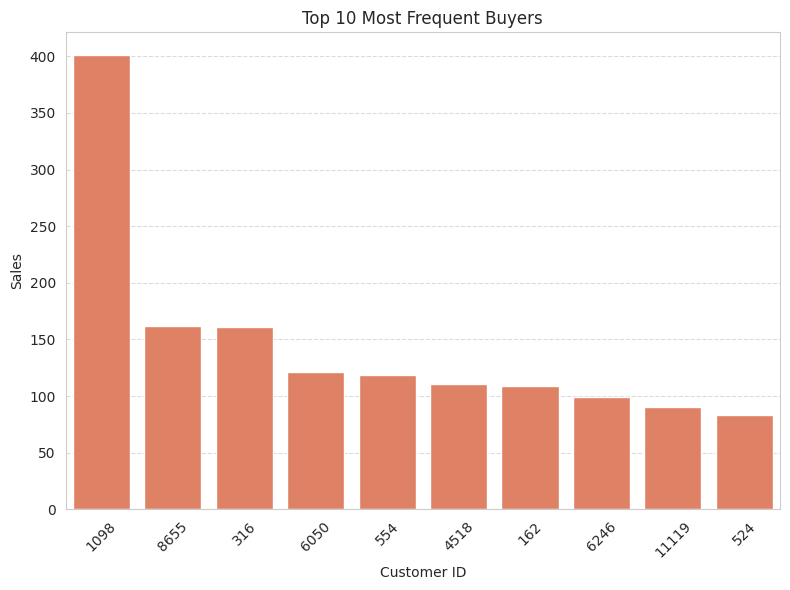

In [24]:
partner_counts = data['PartnerId'].value_counts()
top_10_partners = partner_counts.head(10).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_partners.index, y=top_10_partners.values, color=palette[4], order=top_10_partners.index)

plt.title('Top 10 Most Frequent Buyers')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

From this chart, we can easily identify which clients are the most active purchasers of our company and how many invoices have been issued to each of them.

**DocumentDate**

In [21]:
data['DocumentDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9818 entries, 0 to 9817
Series name: DocumentDate
Non-Null Count  Dtype         
--------------  -----         
9818 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.8 KB


In [22]:
data['DocumentDate'].nunique()

250

Sales occurred on 250 days of the year at the company.

In [23]:
data['DocumentDate'].isna().any()

False

No dates are missing from any of the invoices.

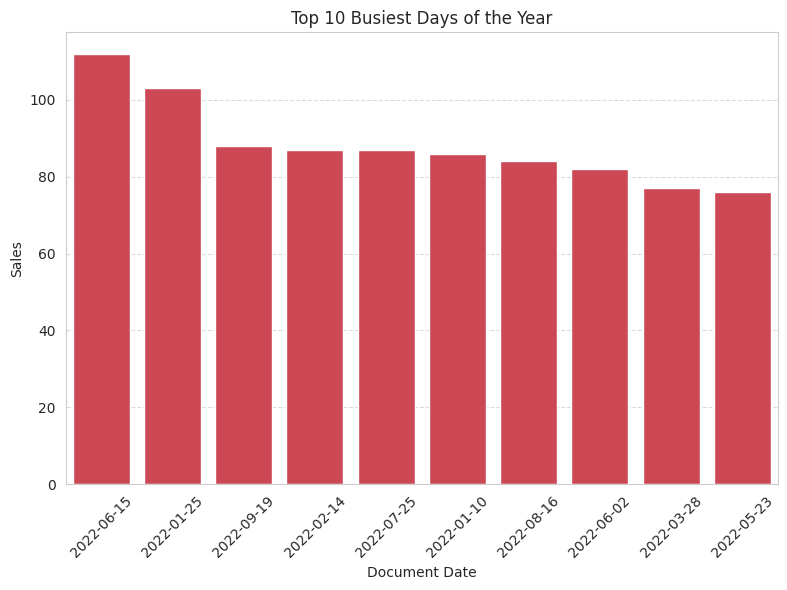

In [25]:
day_counts = data['DocumentDate'].value_counts()
top_10_days = day_counts.head(10).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_days.index, y=top_10_days.values, color=palette[3], order=top_10_days.index)

plt.title('Top 10 Busiest Days of the Year')
plt.xlabel('Document Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The period of the year with the most profitable days varies significantly.

**City**

In [26]:
data['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9818 entries, 0 to 9817
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
9807 non-null   object
dtypes: object(1)
memory usage: 76.8+ KB


In [27]:
data['City'].nunique()

256

The company's clients are headquartered in 256 different cities.

In [28]:
data['City'].isna().any()

True

In [29]:
data['City'].isna().sum()

11

In the headquarters dimension, there are already missing values (specifically 11). We need to examine which ones are missing.

In [30]:
data[data['City'].isna()]

DocumentId  PartnerId DocumentDate City     Sales
1         821727      12508   2022-08-01  NaN  -4345.24
795       801975       7863   2022-07-08  NaN     81.59
1524      814134       7863   2022-07-27  NaN    165.59
4032      784554       7863   2022-05-05  NaN    457.11
6686      822062      12508   2022-09-01  NaN    879.46
6871      820064       7863   2022-09-16  NaN    912.08
7569      797966       7863   2022-05-04  NaN   1080.40
9401      761887       9179   2022-01-26  NaN   2486.83
9602      797970       7863   2022-05-05  NaN   3104.35
9697      814595      12508   2022-07-18  NaN   4345.24
9785      796390      12414   2022-06-02  NaN  11072.32

First, we can check if the headquarters information for the missing values appears on any other invoices belonging to the same partner, and if the omission was just accidental.

In [31]:
data[data['PartnerId'] == 12508]

DocumentId  PartnerId DocumentDate City    Sales
1         821727      12508   2022-08-01  NaN -4345.24
6686      822062      12508   2022-09-01  NaN   879.46
9697      814595      12508   2022-07-18  NaN  4345.24

In [32]:
data[data['PartnerId'] == 7863]

DocumentId  PartnerId DocumentDate City    Sales
795       801975       7863   2022-07-08  NaN    81.59
1524      814134       7863   2022-07-27  NaN   165.59
4032      784554       7863   2022-05-05  NaN   457.11
6871      820064       7863   2022-09-16  NaN   912.08
7569      797966       7863   2022-05-04  NaN  1080.40
9602      797970       7863   2022-05-05  NaN  3104.35

In [33]:
data[data['PartnerId'] == 9179]

DocumentId  PartnerId DocumentDate City    Sales
9401      761887       9179   2022-01-26  NaN  2486.83

In [34]:
data[data['PartnerId'] == 12414]

DocumentId  PartnerId DocumentDate City     Sales
9785      796390      12414   2022-06-02  NaN  11072.32

Unfortunately, the headquarters information does not appear on any other invoices for the missing cases. Therefore, we will set these values to "Unknown."

In [35]:
data['City'].fillna('Unknown', inplace=True)

In [36]:
data[data['City'] == 'Unknown']

DocumentId  PartnerId DocumentDate     City     Sales
1         821727      12508   2022-08-01  Unknown  -4345.24
795       801975       7863   2022-07-08  Unknown     81.59
1524      814134       7863   2022-07-27  Unknown    165.59
4032      784554       7863   2022-05-05  Unknown    457.11
6686      822062      12508   2022-09-01  Unknown    879.46
6871      820064       7863   2022-09-16  Unknown    912.08
7569      797966       7863   2022-05-04  Unknown   1080.40
9401      761887       9179   2022-01-26  Unknown   2486.83
9602      797970       7863   2022-05-05  Unknown   3104.35
9697      814595      12508   2022-07-18  Unknown   4345.24
9785      796390      12414   2022-06-02  Unknown  11072.32

In [37]:
data['City'].isna().any()

False

The missing values have now been resolved.

Next, we need to check for city names that might appear as separate cities due to minor typographical errors but actually refer to the same location. These should be standardized to a consistent format.

In [38]:
unique_cities = sorted(data['City'].unique())
for city in unique_cities:
    print(city)

ADEA
AGHIRESU-FABRICI
AIUD
ALBA IULIA
ALBA-IULIA
ALBESTI
AMARA
ANDRID
ARAD
ARMENIS
BACAU
BACIU
BAIA DE FIER
BAIA MARE
BAIA SPRIE
BAILE HERCULANE
BAILE TUSNAD
BARLAD
BARZAVA
BECICHERECU MIC
BECLEAN
BEIUS
BELOBRESCA
BICAZ
BISTRITA
BIVOLARIA
BODOC
BOLDESTI-SCAENI
BORLOVA
BORSA
BORSEC
BOTOSANI
BRAD
BRADESTI
BRANCOVENESTI
BRASOV
BREAZU
BREBU NOU
BRODINA
BUCURESTI
BUCURESTI SECTORUL 1
BUCURESTI SECTORUL 2
BUCURESTI SECTORUL 3
BUCURESTI SECTORUL 4
BUCURESTI SECTORUL 5
BUCURESTI SECTORUL 6
BUDAPESTA
BUFTEA
BUMBESTI-JIU
BUZAU
BUZIAS
CALIMANESTI
CAMPU LUI NEAG
CAMPULUNG
CAPALNITA
CARACAL
CARANSEBES
CARASOVA
CAREI
CERASU
CHEIA
CHICHIS
CHISINEU-CRIS
CICEU-MIHAIESTI
CLUJ
CLUJ NAPOCA
CLUJ-NAPOCA
CODLEA
COMANESTI
CONSTANTA
CORNESTI
CORUNCA
CORUND
COVASNA
COZMENI
CRAIOVA
CRISTESTI
CRISTURU SECUIESC
CUCORANI
CURTICI
DANESTI
DARABANI
DARMANESTI
DEJ
DETA
DEVA
DOLJ
DRAGOMIRESTI
DRAMBAR
DROBETA TURNU SEVERIN
DUDESTII VECHI
DUMBRAVA ROSIE
DUMBRAVITA
FAGARAS
FALTICENI
FELDIOARA
FELICENI
FILIASI
FLORESTI
FOCS

We will remove hyphens from the city names:

In [39]:
data['City'] = data['City'].str.replace('-', ' ')

We will generalize headquarters located in different sectors of Bucharest to simply "Bucharest" to reflect the total number of companies based in Bucharest:

In [40]:
data['City'] = data['City'].str.replace(r'(.*)BUCURESTI SECTORUL(.*)', r'BUCURESTI', regex=True)

The following changes correct various city names or replace county names with "Unknown" for the city where only the county name is provided:

In [41]:
mask = data['City'] == 'CLUJ'
data.loc[mask, 'City'] = 'CLUJ Unknown City'

mask = data['City'] == 'HARGHITA'
data.loc[mask, 'City'] = 'HARGHITA Unknown City'

data['City'] = data['City'].str.replace('OD SECUIESC', 'ODORHEIU SECUIESC')
data['City'] = data['City'].str.replace('ODORHEIUL SECUIESC', 'ODORHEIU SECUIESC')

data['City'] = data['City'].str.replace('TG MURES', 'TARGU MURES')

data.loc[data['City'].str.contains('^TIMIS$', regex=True), 'City'] = 'TIMIS Unknown City'

data['City'] = data['City'].str.replace('TG SECUIESC', 'TARGU SECUIESC')

data['City'] = data['City'].str.replace(r'\s+', ' ', regex=True)

data['City'] = data['City'].str.replace(r'(.*)(GHEORGHE)(.*)', r'SFANTU GHEORGHE', regex=True)

In [42]:
unique_cities = sorted(data['City'].unique())
for city in unique_cities:
    print(city)

ADEA
AGHIRESU FABRICI
AIUD
ALBA IULIA
ALBESTI
AMARA
ANDRID
ARAD
ARMENIS
BACAU
BACIU
BAIA DE FIER
BAIA MARE
BAIA SPRIE
BAILE HERCULANE
BAILE TUSNAD
BARLAD
BARZAVA
BECICHERECU MIC
BECLEAN
BEIUS
BELOBRESCA
BICAZ
BISTRITA
BIVOLARIA
BODOC
BOLDESTI SCAENI
BORLOVA
BORSA
BORSEC
BOTOSANI
BRAD
BRADESTI
BRANCOVENESTI
BRASOV
BREAZU
BREBU NOU
BRODINA
BUCURESTI
BUDAPESTA
BUFTEA
BUMBESTI JIU
BUZAU
BUZIAS
CALIMANESTI
CAMPU LUI NEAG
CAMPULUNG
CAPALNITA
CARACAL
CARANSEBES
CARASOVA
CAREI
CERASU
CHEIA
CHICHIS
CHISINEU CRIS
CICEU MIHAIESTI
CLUJ NAPOCA
CLUJ Unknown City
CODLEA
COMANESTI
CONSTANTA
CORNESTI
CORUNCA
CORUND
COVASNA
COZMENI
CRAIOVA
CRISTESTI
CRISTURU SECUIESC
CUCORANI
CURTICI
DANESTI
DARABANI
DARMANESTI
DEJ
DETA
DEVA
DOLJ
DRAGOMIRESTI
DRAMBAR
DROBETA TURNU SEVERIN
DUDESTII VECHI
DUMBRAVA ROSIE
DUMBRAVITA
FAGARAS
FALTICENI
FELDIOARA
FELICENI
FILIASI
FLORESTI
FOCSANI
FRUMOASA
GALATI
GHIDFALAU
GHIMBAV
GHIRODA
GIARMATA VII
GIROC
GORNESTI
HALCHIU
HARGHITA Unknown City
HARLAU
HARMAN
HATEG
HUEDIN
HUNED

We can see that only unique city names remain in the dataset.

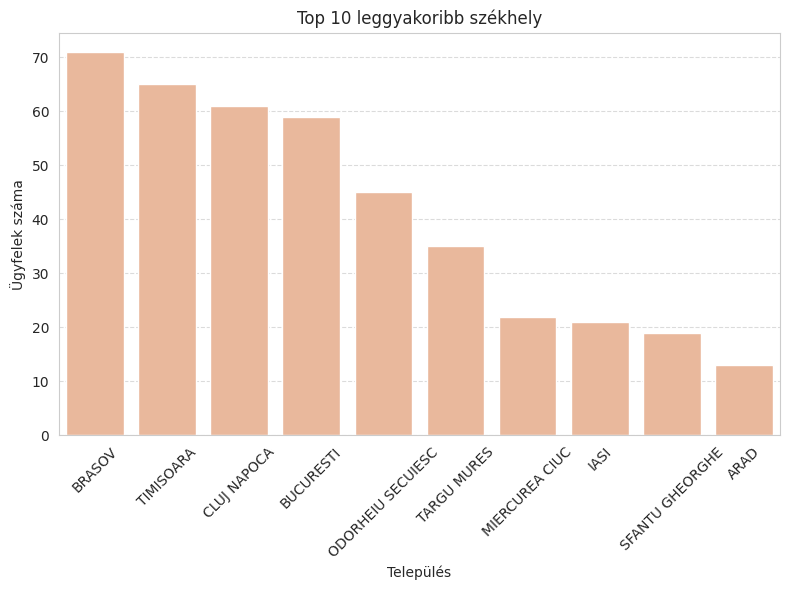

In [43]:
cities = data.drop_duplicates(subset=['PartnerId', 'City'])

city_counts = cities['City'].value_counts()

top_10_city = city_counts.head(10).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_city.index, y=top_10_city.values, color=palette[5], order=top_10_city.index)

plt.title('Top 10 leggyakoribb székhely')
plt.xlabel('Település')
plt.ylabel('Ügyfelek száma')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The majority of our company's partners are headquartered in Brașov.

**Sales**

In [44]:
data['Sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9818 entries, 0 to 9817
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
9818 non-null   float64
dtypes: float64(1)
memory usage: 76.8 KB


Since the data type is float, it ensures that only numbers are present in the variable values, and no typographical errors have been mixed in.

In [45]:
data['Sales'].isna().any()

False

In [46]:
data.dtypes

DocumentId               int64
PartnerId                int64
DocumentDate    datetime64[ns]
City                    object
Sales                  float64
dtype: object

There are no missing values among the invoice amounts.

In [47]:
data[data['Sales'] <= 0]

DocumentId  PartnerId DocumentDate            City     Sales
0        822217        331   2022-09-27          BRASOV -79375.42
1        821727      12508   2022-08-01         Unknown  -4345.24
2        840424       8939   2022-12-20       TIMISOARA  -2952.60
3        758393       1098   2022-01-11       BUCURESTI  -2428.48
4        830027       7569   2022-10-28       TIMISOARA  -2205.90
..          ...        ...          ...             ...       ...
338      833782       1720   2022-11-15         SACALAZ      0.00
339      840442       7330   2022-12-20  MIERCUREA CIUC      0.00
340      840444       8813   2022-12-20  MIERCUREA CIUC      0.00
341      840817       1804   2022-12-23       TIMISOARA      0.00
342      841065      11246   2022-12-27         IZVOARE      0.00

[343 rows x 5 columns]

Here, we can see that invoices may have negative values.

These could be due to:

*   Credit invoices: The client returned the product.
*   Advance payments: The client paid the full amount based on a proforma invoice.
*   Invoice adjustments: Billing for a product with a discount of equal value.
*   Post-purchase discounts: Discounts applied after multiple purchases.
*   Other reasons.

Due to these reasons, these invoices cannot be considered separate purchases and will not be included in our further analysis.

In [48]:
data_pos = data[data['Sales'] > 0]

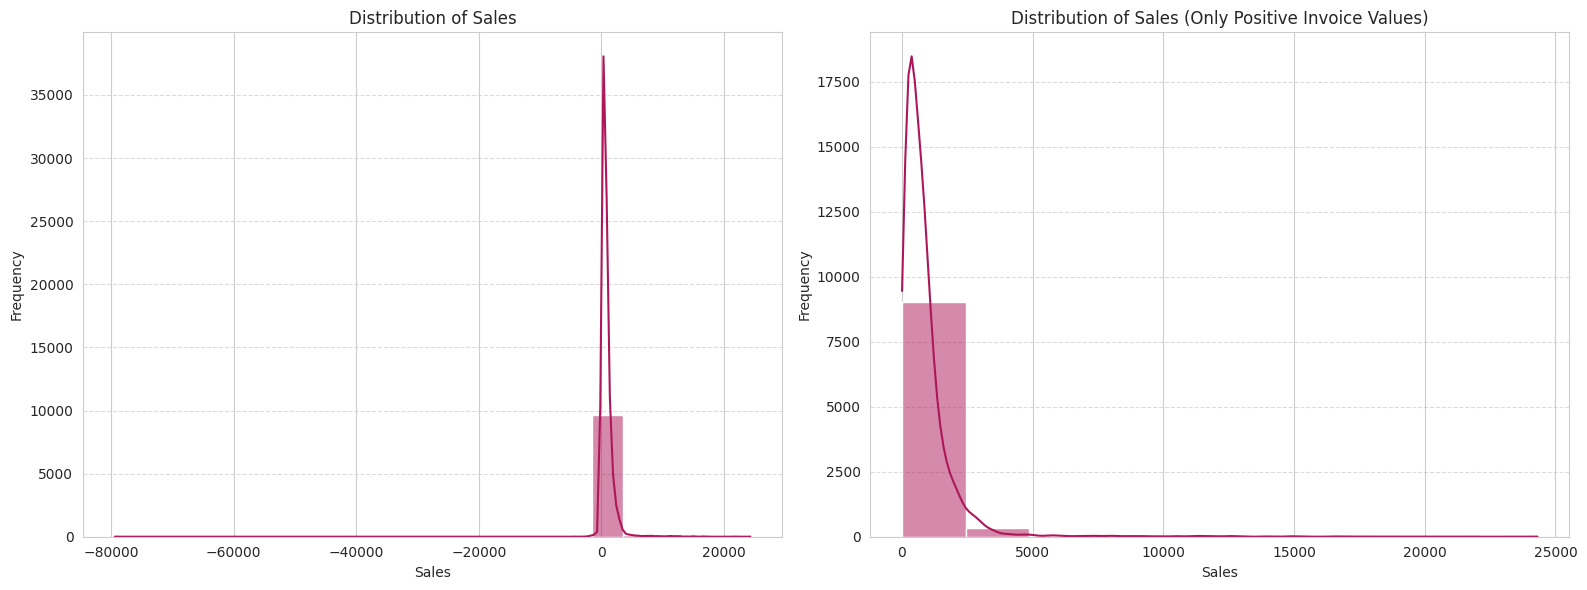

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data['Sales'], kde=True, bins=20, color=palette[2], ax=axs[0])
axs[0].set_title('Distribution of Sales')
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(data_pos['Sales'], kde=True, bins=10, color=palette[2], ax=axs[1])
axs[1].set_title('Distribution of Sales (Only Positive Invoice Values)')
axs[1].set_xlabel('Sales')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can see that the distribution of values changes significantly after removing negative and zero invoice amounts; however, this was a necessary step. This chart also hints at the presence of outlier values, which will need to be addressed before modeling.

In [50]:
data = data_pos

In [51]:
data.shape

(9475, 5)

We have 9,475 invoices remaining for analysis.

In [52]:
data.head()

DocumentId  PartnerId DocumentDate       City  Sales
343      779058      10592   2022-04-13     BRASOV   6.42
344      829740      12054   2022-10-27      GIROC   6.83
345      829748      12593   2022-10-27    CORUNCA   6.83
346      781716      11567   2022-04-26  BUCURESTI  10.90
347      803442        162   2022-07-14     SOVATA  11.76

## **Exploratory Data Analysis (EDA)**

In this section, we will delve deeper into uncovering potential patterns within the data.

**Quarterly Sales Trends**

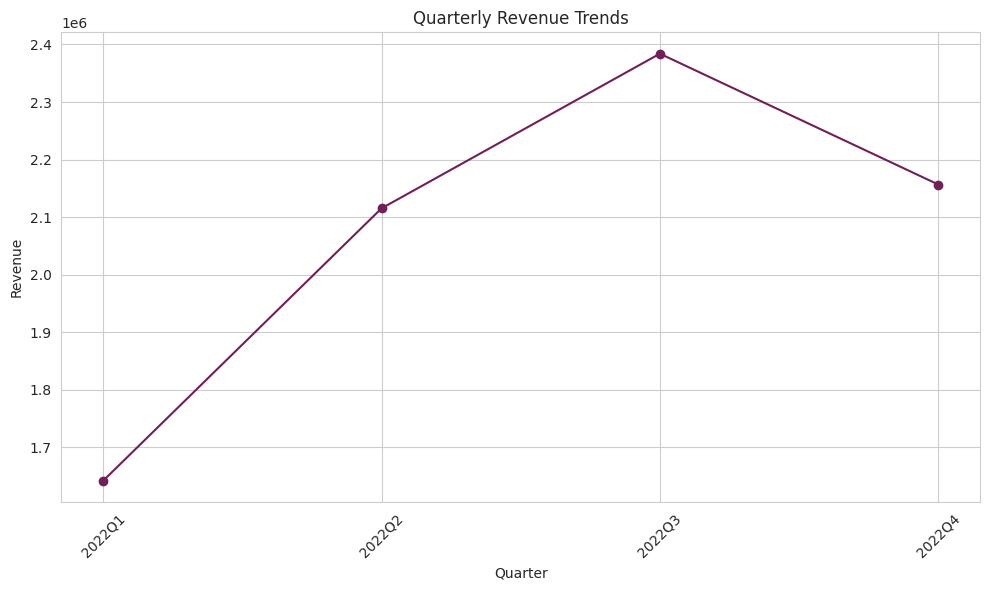

In [53]:
data['Quarter'] = data['DocumentDate'].dt.to_period('Q')
quarterly_sales = data.groupby('Quarter')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales['Quarter'].astype(str), quarterly_sales['Sales'], marker='o', color=palette[1])
plt.title('Quarterly Revenue Trends')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that the highest revenue for the company occurred during the summer months, in the third quarter.

The following charts display sales values that exceed the average of subsequent sales. In the chart titled "Sales by City," the total sales values for each city are shown. The chart titled "Number of Sales by City" illustrates the number of sales conducted in each city.

In [54]:
sales_mean = data['Sales'].mean()
sales_mean

875.7196622691291

In [55]:
selected_cities = data[data['Sales'] >= sales_mean]['City']
filtered_data = data[data['City'].isin(selected_cities)]

**Number and Value of Sales by City**

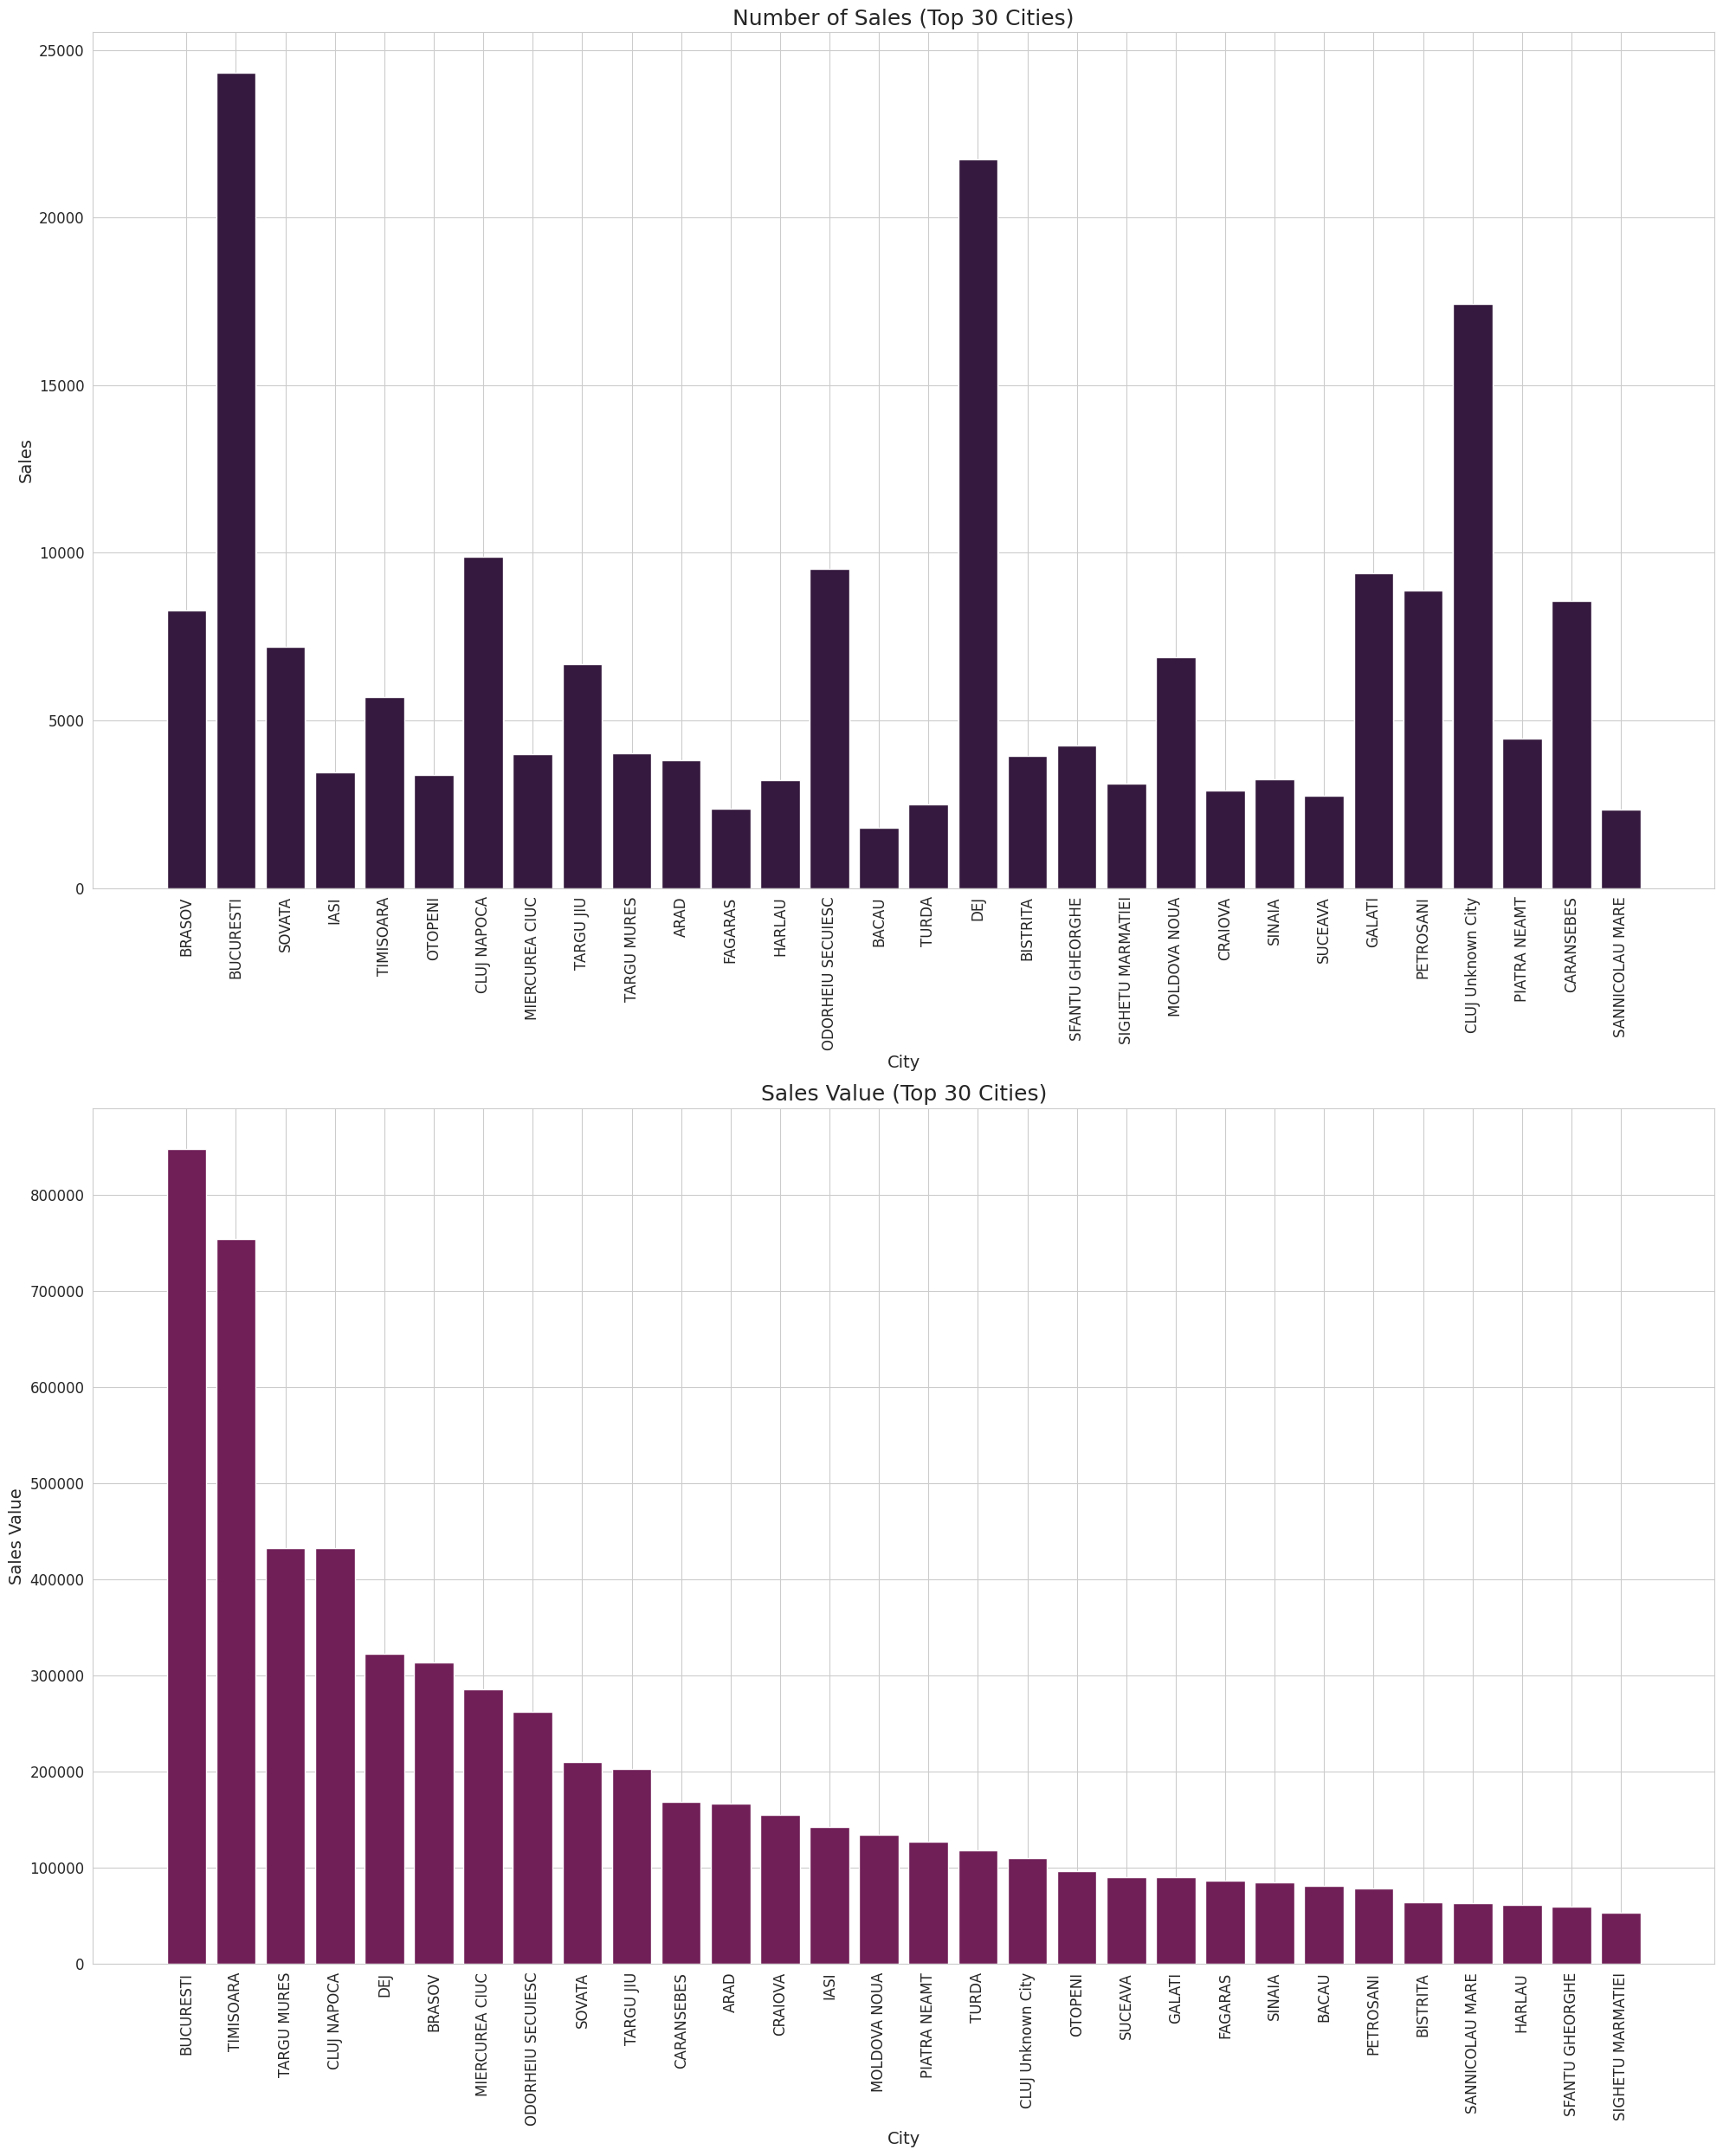

In [56]:
city_sales_sum_filtered = filtered_data.groupby('City')['Sales'].sum().reset_index()
city_sales_sum_filtered.columns = ['City', 'Sales Sum']

top_30_cities = city_sales_sum_filtered.sort_values(by='Sales Sum', ascending=False).head(30)

fig, axs = plt.subplots(2, 1, figsize=(20, 25))

top_30_sales_data = data[data['City'].isin(top_30_cities['City'])]
axs[0].bar(top_30_sales_data['City'], top_30_sales_data['Sales'], color=palette[0], width=0.8)
axs[0].set_title('Number of Sales (Top 30 Cities)', fontsize=18)
axs[0].set_xlabel('City', fontsize=14)
axs[0].set_ylabel('Sales', fontsize=14)
axs[0].tick_params(axis='x', rotation=90, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

axs[1].bar(top_30_cities['City'], top_30_cities['Sales Sum'], color=palette[1], width=0.8)
axs[1].set_title('Sales Value (Top 30 Cities)', fontsize=18)
axs[1].set_xlabel('City', fontsize=14)
axs[1].set_ylabel('Sales Value', fontsize=14)
axs[1].tick_params(axis='x', rotation=90, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

Here are some key statistics related to the above charts.

**Most Frequent Buyer**

In [57]:
most_frequent_partner_count = data['PartnerId'].value_counts().max()
most_frequent_partner = data['PartnerId'].value_counts().idxmax()
city_of_most_frequent_partner = data[data['PartnerId'] == most_frequent_partner]['City'].iloc[0]

print("The ID of the most frequent buyer:", most_frequent_partner)
print("City associated with this customer:", city_of_most_frequent_partner)
print("Sales:", most_frequent_partner_count)

The ID of the most frequent buyer: 1098
City associated with this customer: BUCURESTI
Sales: 396


**Customer with the Highest Spending**

In [58]:
partner_with_highest_sales = data.groupby('PartnerId')['Sales'].sum().idxmax()
sales_of_highest_sales_partner = data.groupby('PartnerId')['Sales'].sum().max()
city_of_highest_sales_partner = data[data['PartnerId'] == partner_with_highest_sales]['City'].iloc[0]

print("The customer with the highest spending:", partner_with_highest_sales)
print("City associated with this customer:", city_of_highest_sales_partner)
print("Purchased Amount:", sales_of_highest_sales_partner)

The customer with the highest spending: 8191
City associated with this customer: TARGU MURES
Purchased Amount: 328839.63


**Highest Sales Value:**

In [59]:
max_positive_sales = data['Sales'].max()
max_positive_sales_data = data[data['Sales'] == max_positive_sales][['DocumentId', 'PartnerId', 'City']]

print("Highest Sales Value:", max_positive_sales)
print("\nThe corresponding data:")
print(max_positive_sales_data)


Highest Sales Value: 24313.420000000002

The corresponding data:
      DocumentId  PartnerId       City
9817      823019       8191  BUCURESTI


**Lowest Sales Value:**

In [60]:
min_positive_sales = data['Sales'].min()
min_positive_sales_data = data[data['Sales'] == min_positive_sales][['DocumentId', 'PartnerId', 'City']]

print("Smallest Positive Sales Value:", min_positive_sales)
print("\nThe corresponding data:")
print(min_positive_sales_data)

Smallest Positive Sales Value: 6.42

The corresponding data:
     DocumentId  PartnerId    City
343      779058      10592  BRASOV


**Monthly Purchasing Trends of Customers**



In [61]:
data2 = data.copy()

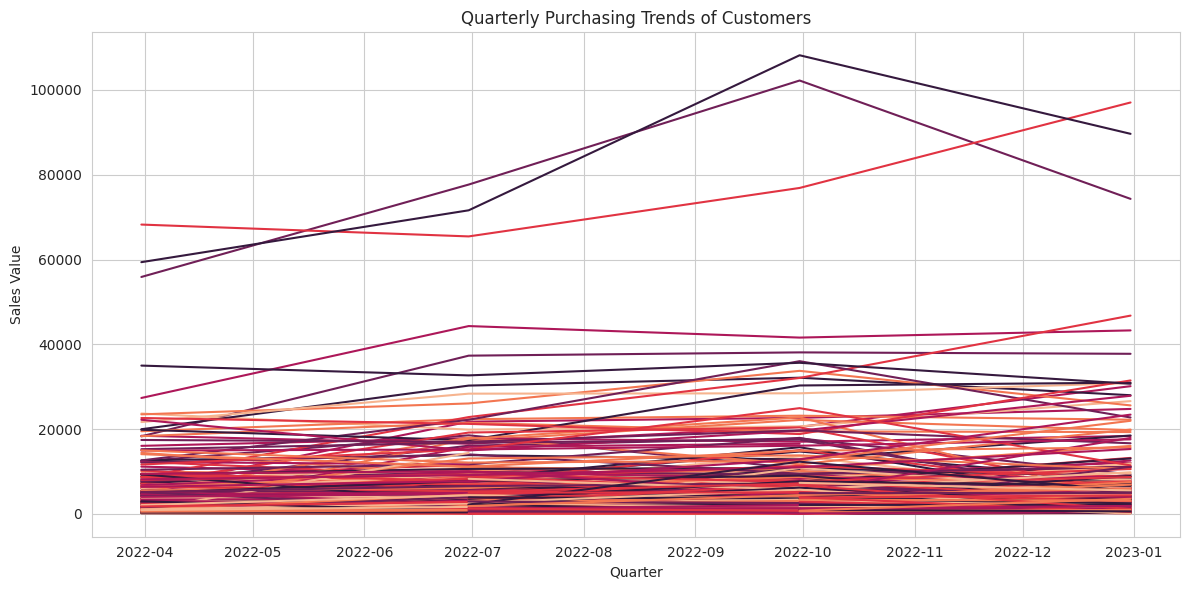

In [62]:
average_sales = data2['Sales'].mean()

data2['DocumentDate'] = pd.to_datetime(data2['DocumentDate'])
data2.set_index('DocumentDate', inplace=True)
quarterly_sales = data2.resample('Q')['Sales'].sum()

trending_customers = data2.groupby('PartnerId')['Sales'].sum()
trending_customers = trending_customers[trending_customers > average_sales]

plt.figure(figsize=(12, 6))
for partner_id in trending_customers.index:
    partner_sales = data2[data2['PartnerId'] == partner_id]['Sales'].resample('Q').sum()
    plt.plot(partner_sales.index, partner_sales.values)

plt.title('Quarterly Purchasing Trends of Customers')
plt.xlabel('Quarter')
plt.ylabel('Sales Value')
plt.grid(True)
plt.tight_layout()
plt.show()


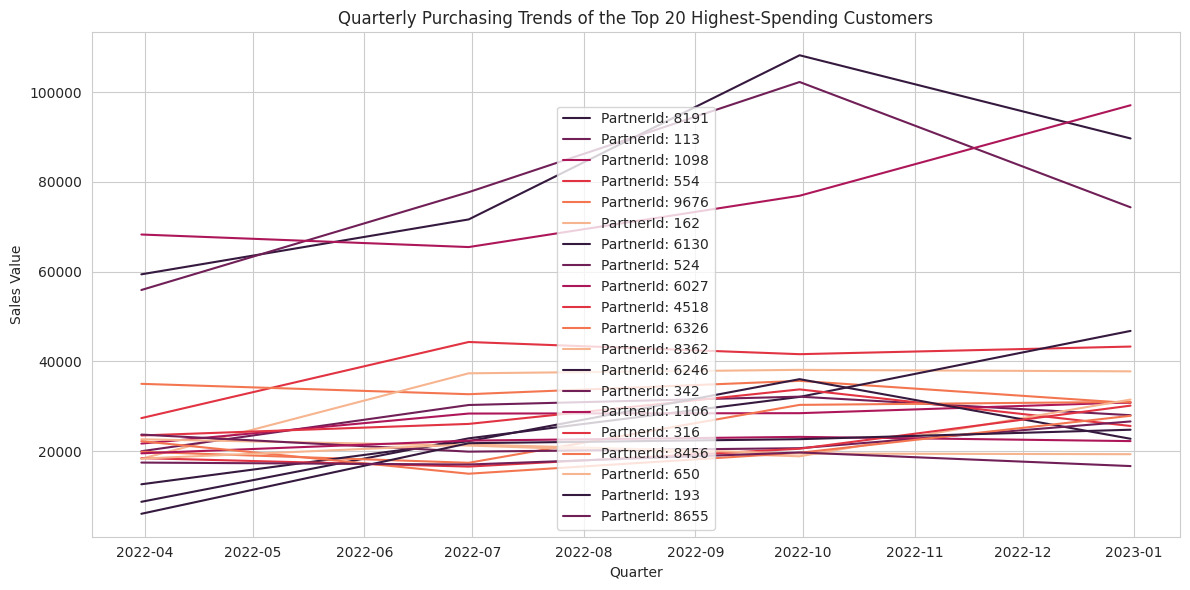

In [63]:
top_20_customers = trending_customers.nlargest(20)

plt.figure(figsize=(12, 6))
for partner_id in top_20_customers.index:
    partner_sales = data2[data2['PartnerId'] == partner_id]['Sales'].resample('Q').sum()
    plt.plot(partner_sales.index, partner_sales.values, label=f'PartnerId: {partner_id}')

plt.title('Quarterly Purchasing Trends of the Top 20 Highest-Spending Customers')
plt.xlabel('Quarter')
plt.ylabel('Sales Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

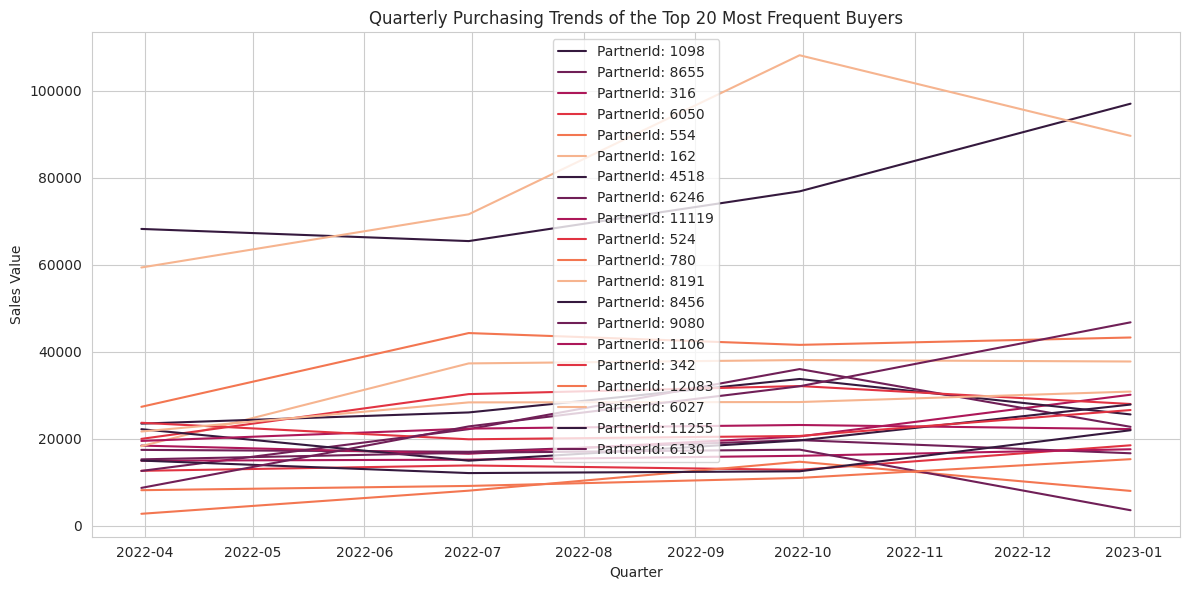

In [64]:
partner_sales_count = data2.groupby('PartnerId').size()
top_20_customers = partner_sales_count.nlargest(20)

plt.figure(figsize=(12, 6))
for partner_id in top_20_customers.index:
    partner_sales = data2[data2['PartnerId'] == partner_id]['Sales'].resample('Q').sum()
    plt.plot(partner_sales.index, partner_sales.values, label=f'PartnerId: {partner_id}')

plt.title('Quarterly Purchasing Trends of the Top 20 Most Frequent Buyers')
plt.xlabel('Quarter')
plt.ylabel('Sales Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sales Statistics:

In [65]:
sales_std = data['Sales'].std()
sales_var = data['Sales'].var()

sales_median = data['Sales'].median()
sales_quartiles = np.percentile(data['Sales'], [25, 50, 75])

print("Sales Standard Deviation:", sales_std)
print("Variance of Sales:", sales_var)
print("Median of Sales:", sales_median)
print("First Quartile (Q1) of Sales:", sales_quartiles[0])
print("Median of Sales (Q2):", sales_quartiles[1])
print("Third Quartile (Q3) of Sales:", sales_quartiles[2])

Sales Standard Deviation: 1198.6518553069932
Variance of Sales: 1436766.270230897
Median of Sales: 612.48
First Quartile (Q1) of Sales: 295.975
Median of Sales (Q2): 612.48
Third Quartile (Q3) of Sales: 1044.9499999999998


## **Handling Outliers**

The next very important step in the analysis is handling outliers, which in some cases can distort the performance of the model.

The best way to visualize outliers is with a box plot.

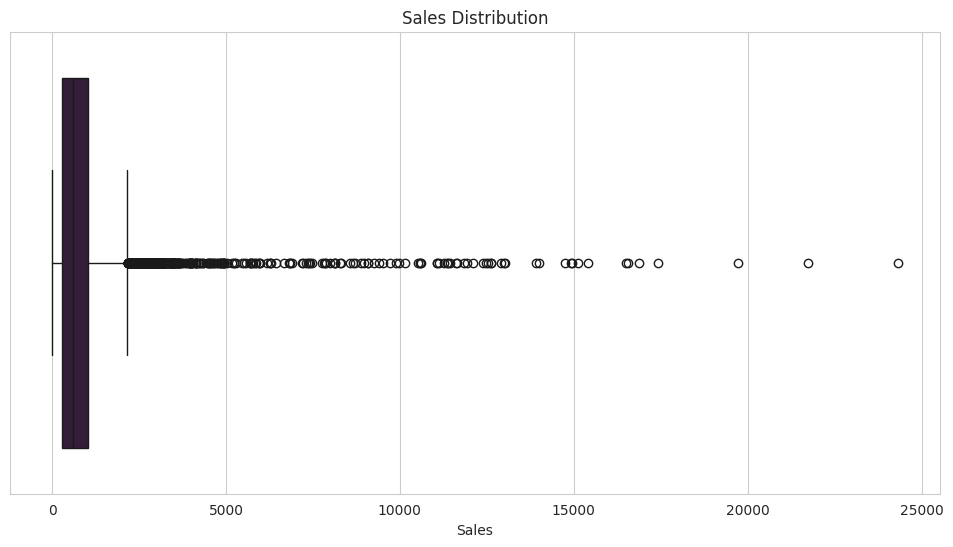

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Sales'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

We can also examine outliers using statistical methods; in this case, we will use the IQR (Interquartile Range) method.

In [67]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR))]

print(f'Number of outliers: {outliers.shape[0]}')

Number of outliers: 562



A significant number of outliers can be identified; however, from an analytical perspective, they are important and should not be considered erroneous data. They may contribute to cluster formation as important group characteristics.

## **RFM Analysis**

To implement RFM (Frequency, Recency, and Monetary) analysis, it is necessary to calculate the following metrics for each partner:

* Frequency: The total number of transactions associated with each partner.
* Recency: The date of the most recent invoice for each partner.
* Monetary Value: The total monetary value of purchases made by each partner.

****Recency Calculation****

In [68]:
data_recency = data.groupby(by='PartnerId',
                        as_index=False)['DocumentDate'].max()
data_recency.columns = ['PartnerId', 'LastPurchaseDate']
recent_date = data_recency['LastPurchaseDate'].max()
data_recency['Recency'] = data_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
data_recency.head()

PartnerId LastPurchaseDate  Recency
0          4       2022-12-14       16
1        113       2022-12-20       10
2        124       2022-11-07       53
3        125       2022-03-21      284
4        142       2022-10-17       74

We created a separate table that includes the `PartnerId`, the date of their most recent purchase, and the number of days elapsed from that purchase to the company's most recent transaction.

**Frequency Calculation**

In [69]:
frequency_data = data.drop_duplicates().groupby(
    by=['PartnerId'], as_index=False)['DocumentDate'].count()
frequency_data.columns = ['PartnerId', 'Frequency']
frequency_data.head()

PartnerId  Frequency
0          4          2
1        113         45
2        124          7
3        125          1
4        142          3

Here, we calculated the total number of transactions associated with each partner.

**Monetary Value Calculation**

In [70]:
monetary_data = data.groupby(by='PartnerId', as_index=False)['Sales'].sum()
monetary_data.columns = ['PartnerId', 'Monetary']
monetary_data.head()

PartnerId   Monetary
0          4    1404.80
1        113  310114.50
2        124    2106.01
3        125     445.00
4        142    1193.42

For this table, we aggregate the total sales value for each partner.

**Summarization**

In [71]:
rf_data = data_recency.merge(frequency_data, on='PartnerId')
rfm_data = rf_data.merge(monetary_data, on='PartnerId').drop(
    columns='LastPurchaseDate')
rfm_data.head()

PartnerId  Recency  Frequency   Monetary
0          4       16          2    1404.80
1        113       10         45  310114.50
2        124       53          7    2106.01
3        125      284          1     445.00
4        142       74          3    1193.42

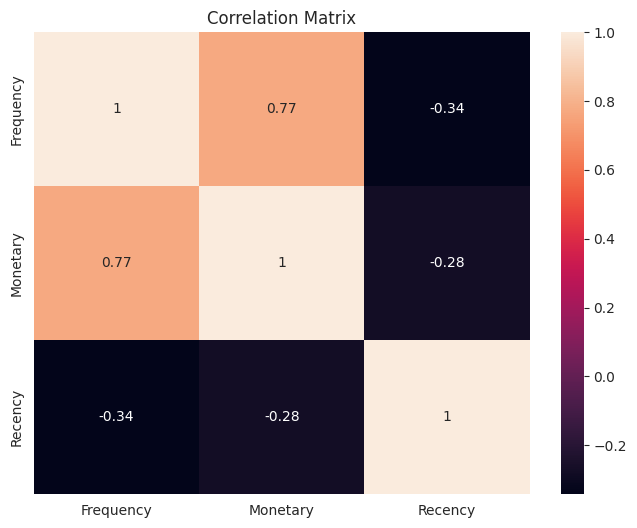

In [72]:
numerical_cols = ['Frequency', 'Monetary', 'Recency']
correlation_matrix = rfm_data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=c_palette)

plt.title('Correlation Matrix')
plt.show()

This correlation matrix reveals the following:

* The strongest correlation exists between frequency and monetary value, and since the correlation is positive, an increase in one value is likely to result in an increase in the other.
* There is a weaker negative correlation between recency and both frequency, as well as recency and monetary value; as one increases, the other may decrease.

There is no causal relationship indicated among these features.

Using the following code snippet, we rank clients based on all three features and then calculate a scaled, normalized version of these ranking values.

In [73]:
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)

rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['F_rank']/rfm_data['M_rank'].max())*100

rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_data.head()

PartnerId  Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  \
0          4       16          2    1404.80    75.436409    29.900744   
1        113       10         45  310114.50    83.977556    95.471464   
2        124       53          7    2106.01    49.563591    59.429280   
3        125      284          1     445.00     9.538653    11.910670   
4        142       74          3    1193.42    44.139651    39.267990   

   M_rank_norm  
0    29.900744  
1    95.471464  
2    59.429280  
3    11.910670  
4    39.267990

**RFM Value Calculation**

The RFM value is calculated based on the normalized values of recency, frequency, and monetary value. Customers are segmented based on this score, which is rated on a 5-point scale.

The formula used to compute the FRM value is:

RFM Value=0.15×Recency Score+0.28×Frequency Score+0.57×Monetary Score

In [75]:
rfm_data['RFM_Score'] = 0.15 * rfm_data['R_rank_norm'] + 0.28 * rfm_data['F_rank_norm'] + 0.57 * rfm_data['M_rank_norm']
rfm_data['RFM_Score'] = rfm_data['RFM_Score'] * 0.05
rfm_data = rfm_data.round(2)
rfm_data[['PartnerId', 'RFM_Score']].head()

PartnerId  RFM_Score
0          4       1.84
1        113       4.69
2        124       2.90
3        125       0.58
4        142       2.00

RFM Value Categories:

* RFM Value > 4.5: Best Clients
* 4.5 > RFM Value > 4: Valuable Clients
* 4 > RFM Value > 3: Neutral Clients
* 3 > RFM Value > 1.6: Less Important Clients
* 1.6 > RFM Value: Lost Clients

In [76]:
rfm_data["Customer_segment"] = np.where(rfm_data['RFM_Score'] >
                                      4.5, "Best Clients",
                                      (np.where(
                                        rfm_data['RFM_Score'] > 4,
                                        "Valuable Clients",
                                        (np.where(
    rfm_data['RFM_Score'] > 3,
                             "Neutral Clients",
                             np.where(rfm_data['RFM_Score'] > 1.6,
                            'Less Important Clients', 'Lost Clients'))))))
rfm_data[['PartnerId', 'RFM_Score', 'Customer_segment']].head()

PartnerId  RFM_Score        Customer_segment
0          4       1.84  Less Important Clients
1        113       4.69            Best Clients
2        124       2.90  Less Important Clients
3        125       0.58            Lost Clients
4        142       2.00  Less Important Clients

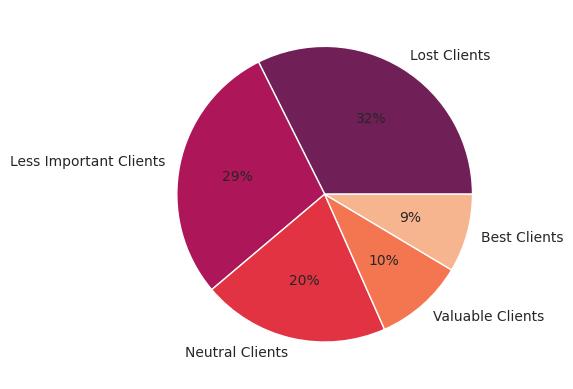

In [77]:
plt.pie(rfm_data.Customer_segment.value_counts(),
        labels=rfm_data.Customer_segment.value_counts().index,
        autopct='%.0f%%',
        colors=palette[1:6])
plt.show()

As we can see, based on the score, we have identified a significant number of lost clients.

In [78]:
label = data[['PartnerId', 'City']]
label = pd.merge(label, rfm_data, on = 'PartnerId')

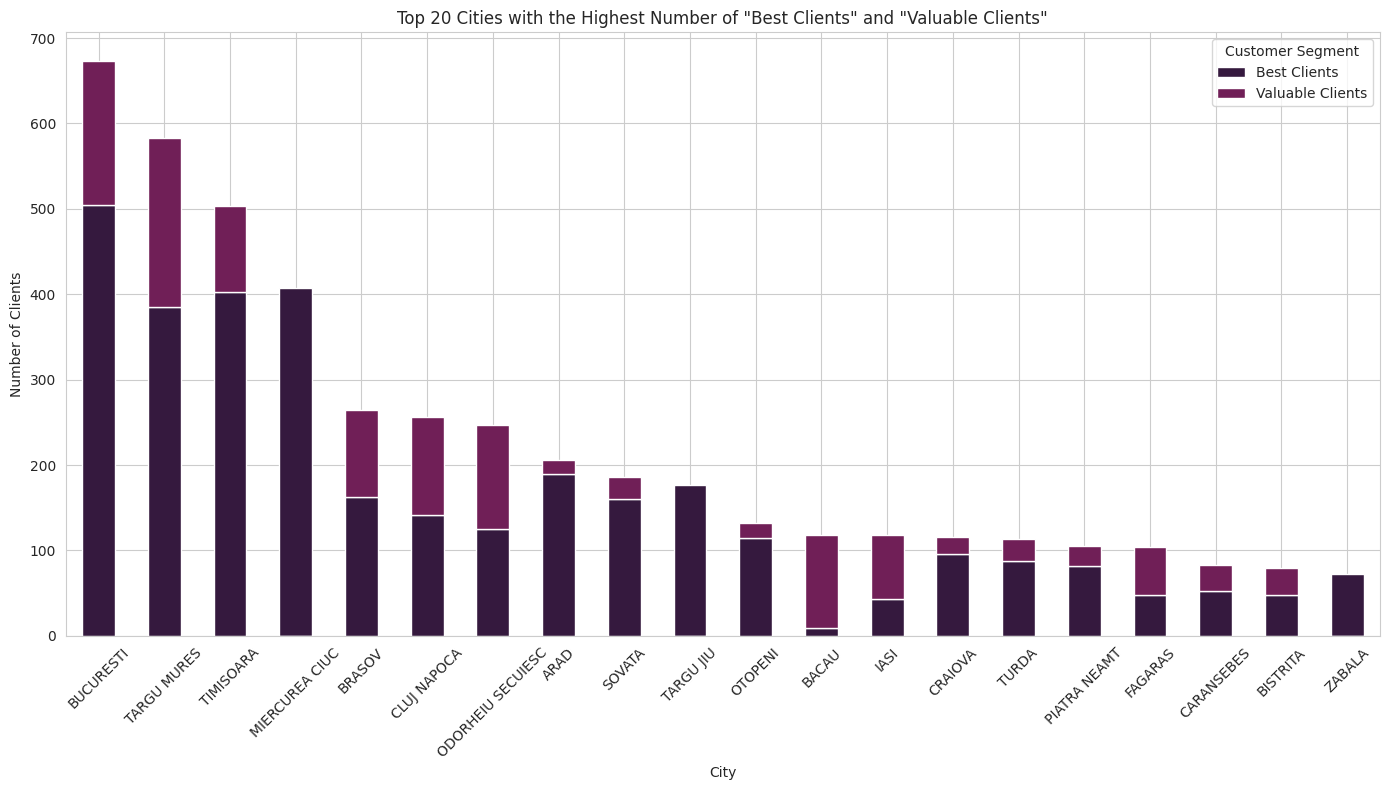

In [80]:
filtered_data = label[label['Customer_segment'].isin(['Best Clients', 'Valuable Clients'])]
city_segment_counts = filtered_data.groupby(['City', 'Customer_segment']).size().unstack().fillna(0)
top_cities = city_segment_counts.sum(axis=1).sort_values(ascending=False).head(20).index
top_city_segment_counts = city_segment_counts.loc[top_cities]
top_city_segment_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 20 Cities with the Highest Number of "Best Clients" and "Valuable Clients"')
plt.xlabel('City')
plt.ylabel('Number of Clients')
plt.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

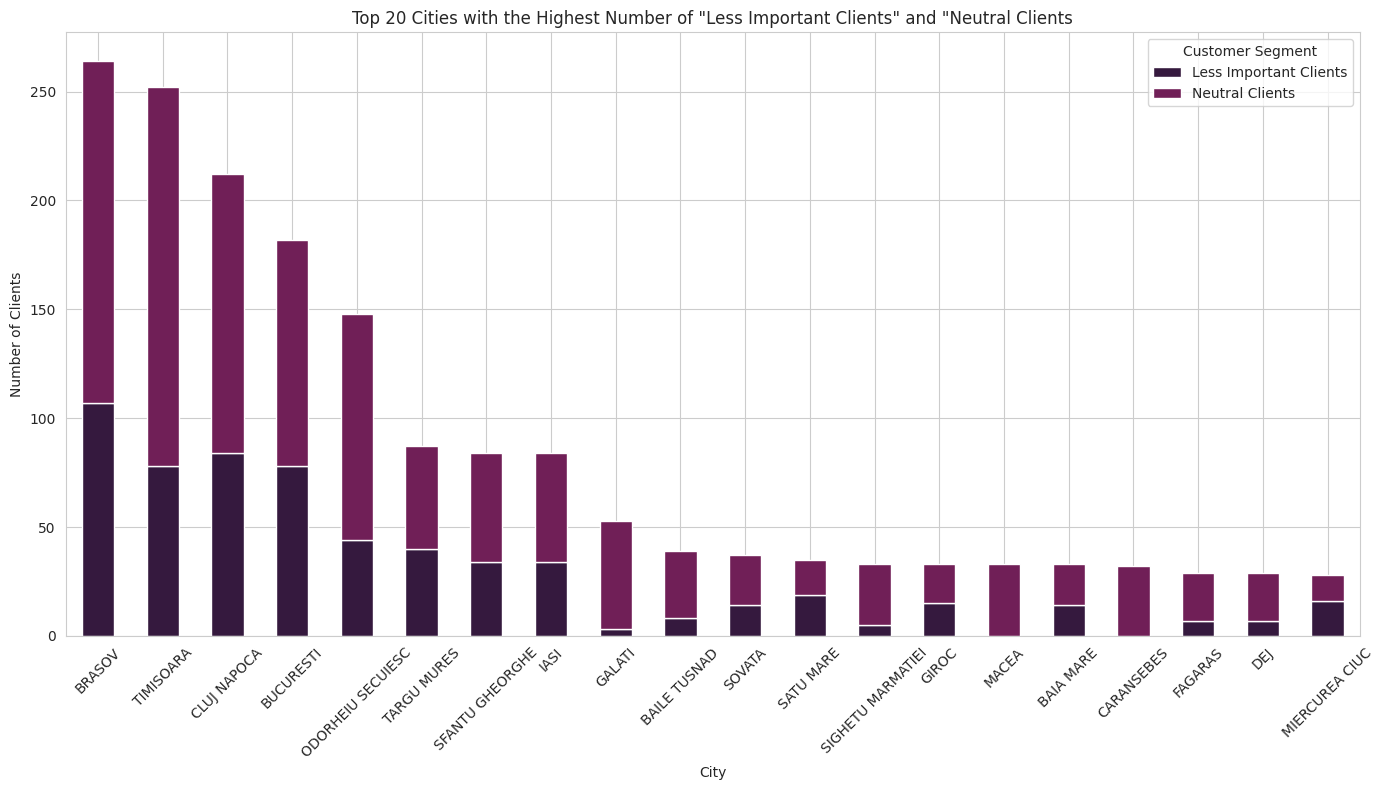

In [82]:
filtered_data = label[label['Customer_segment'].isin(['Less Important Clients', 'Neutral Clients'])]
city_segment_counts = filtered_data.groupby(['City', 'Customer_segment']).size().unstack().fillna(0)
top_cities = city_segment_counts.sum(axis=1).sort_values(ascending=False).head(20).index
top_city_segment_counts = city_segment_counts.loc[top_cities]
top_city_segment_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 20 Cities with the Highest Number of "Less Important Clients" and "Neutral Clients')
plt.xlabel('City')
plt.ylabel('Number of Clients')
plt.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The next phase is to convert the data dimensions into a modelable format.

## **Feature Engineering**

**Transforming rfm_data**

In [83]:
rfm_data.head()

PartnerId  Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  \
0          4       16          2    1404.80        75.44        29.90   
1        113       10         45  310114.50        83.98        95.47   
2        124       53          7    2106.01        49.56        59.43   
3        125      284          1     445.00         9.54        11.91   
4        142       74          3    1193.42        44.14        39.27   

   M_rank_norm  RFM_Score        Customer_segment  
0        29.90       1.84  Less Important Clients  
1        95.47       4.69            Best Clients  
2        59.43       2.90  Less Important Clients  
3        11.91       0.58            Lost Clients  
4        39.27       2.00  Less Important Clients

We will also create a DataFrame named labels to collect variables that we want to visualize interactively in the clustering visualizations.

In [84]:
labels = rfm_data[['PartnerId', 'RFM_Score', 'Customer_segment']]
labels.head()

PartnerId  RFM_Score        Customer_segment
0          4       1.84  Less Important Clients
1        113       4.69            Best Clients
2        124       2.90  Less Important Clients
3        125       0.58            Lost Clients
4        142       2.00  Less Important Clients

In [85]:
rfm_data.dtypes

PartnerId             int64
Recency               int64
Frequency             int64
Monetary            float64
R_rank_norm         float64
F_rank_norm         float64
M_rank_norm         float64
RFM_Score           float64
Customer_segment     object
dtype: object

Here, all values are numeric except for the customer_classification column, which needs to be transformed into dummy variables.

***Customer_segment***

In [86]:
encoded_data = pd.get_dummies(rfm_data['Customer_segment'])
rfm_data = pd.concat([rfm_data, encoded_data], axis=1)
rfm_data.drop('Customer_segment', axis=1, inplace=True)
rfm_data.head()

PartnerId  Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  \
0          4       16          2    1404.80        75.44        29.90   
1        113       10         45  310114.50        83.98        95.47   
2        124       53          7    2106.01        49.56        59.43   
3        125      284          1     445.00         9.54        11.91   
4        142       74          3    1193.42        44.14        39.27   

   M_rank_norm  RFM_Score  Best Clients  Less Important Clients  Lost Clients  \
0        29.90       1.84         False                    True         False   
1        95.47       4.69          True                   False         False   
2        59.43       2.90         False                    True         False   
3        11.91       0.58         False                   False          True   
4        39.27       2.00         False                    True         False   

   Neutral Clients  Valuable Clients  
0            False             False  
1            False             False  
2            False             False  
3            False             False  
4            False             False

In [87]:
rfm_data.dtypes

PartnerId                   int64
Recency                     int64
Frequency                   int64
Monetary                  float64
R_rank_norm               float64
F_rank_norm               float64
M_rank_norm               float64
RFM_Score                 float64
Best Clients                 bool
Less Important Clients       bool
Lost Clients                 bool
Neutral Clients              bool
Valuable Clients             bool
dtype: object

In [88]:
rfm_data.shape

(806, 13)

**Data Transformation**

In [89]:
data.head()

DocumentId  PartnerId DocumentDate       City  Sales Quarter
343      779058      10592   2022-04-13     BRASOV   6.42  2022Q2
344      829740      12054   2022-10-27      GIROC   6.83  2022Q4
345      829748      12593   2022-10-27    CORUNCA   6.83  2022Q4
346      781716      11567   2022-04-26  BUCURESTI  10.90  2022Q2
347      803442        162   2022-07-14     SOVATA  11.76  2022Q3

To merge the two DataFrames, we need to group the data DataFrame by PartnerId and aggregate the other features, ensuring that these dimensions are numeric.

***DocumentId***

We can remove the DocumentId column.

In [90]:
data = data[['PartnerId', 'DocumentDate', 'City', 'Sales', 'Quarter']]
data.head()

PartnerId DocumentDate       City  Sales Quarter
343      10592   2022-04-13     BRASOV   6.42  2022Q2
344      12054   2022-10-27      GIROC   6.83  2022Q4
345      12593   2022-10-27    CORUNCA   6.83  2022Q4
346      11567   2022-04-26  BUCURESTI  10.90  2022Q2
347        162   2022-07-14     SOVATA  11.76  2022Q3

For different columns, we will use different aggregation methods, so we will handle them separately and then consolidate them.

***City***

For the cities, we will take one (the first) value:

In [91]:
cities = data[['PartnerId', 'City']]
cities = cities.groupby('PartnerId')['City'].first().reset_index()
cities.head()

PartnerId        City
0          4      BRASOV
1        113         DEJ
2        124      BRASOV
3        125      BRASOV
4        142  SIGHISOARA

In [92]:
labels = pd.merge(labels, cities, on='PartnerId')
labels.head()

PartnerId  RFM_Score        Customer_segment        City
0          4       1.84  Less Important Clients      BRASOV
1        113       4.69            Best Clients         DEJ
2        124       2.90  Less Important Clients      BRASOV
3        125       0.58            Lost Clients      BRASOV
4        142       2.00  Less Important Clients  SIGHISOARA

We can also transform the cities using dummy variables.

In [93]:
encoded_data = pd.get_dummies(cities['City'])
cities = pd.concat([cities, encoded_data], axis=1)
cities.drop('City', axis=1, inplace=True)
cities.head()

PartnerId   ADEA  AGHIRESU FABRICI   AIUD  ALBA IULIA  ALBESTI  AMARA  \
0          4  False             False  False       False    False  False   
1        113  False             False  False       False    False  False   
2        124  False             False  False       False    False  False   
3        125  False             False  False       False    False  False   
4        142  False             False  False       False    False  False   

   ANDRID   ARAD  ARMENIS  ...  VLADIMIRESCU  VLAHA  VOLUNTARI  VULCAN  \
0   False  False    False  ...         False  False      False   False   
1   False  False    False  ...         False  False      False   False   
2   False  False    False  ...         False  False      False   False   
3   False  False    False  ...         False  False      False   False   
4   False  False    False  ...         False  False      False   False   

   ZABALA  ZALAU    ZAM  ZARNESTI  ZETEA  ZOLTAN  
0   False  False  False     False  False   False  
1   False  False  False     False  False   False  
2   False  False  False     False  False   False  
3   False  False  False     False  False   False  
4   False  False  False     False  False   False  

[5 rows x 232 columns]

In [94]:
cities.dtypes

PartnerId           int64
ADEA                 bool
AGHIRESU FABRICI     bool
AIUD                 bool
ALBA IULIA           bool
                    ...  
ZALAU                bool
ZAM                  bool
ZARNESTI             bool
ZETEA                bool
ZOLTAN               bool
Length: 232, dtype: object

In [95]:
cities.shape

(806, 232)

***DocumentDate***

For the document dates, we will create three new variables: the date of the customer's first purchase, the date of the last purchase, and the number of days between these two dates.

In [96]:
docs = data[['PartnerId', 'DocumentDate']]
docs = docs.groupby('PartnerId').agg(
    EarliestDocument=('DocumentDate', 'min'),
    LatestDocument=('DocumentDate', 'max'),
).reset_index()
docs['DaysBetween'] = (docs['LatestDocument'] - docs['EarliestDocument']).dt.days
docs.head()

PartnerId EarliestDocument LatestDocument  DaysBetween
0          4       2022-08-24     2022-12-14          112
1        113       2022-01-06     2022-12-20          348
2        124       2022-01-14     2022-11-07          297
3        125       2022-03-21     2022-03-21            0
4        142       2022-04-26     2022-10-17          174

In [97]:
labels = pd.merge(labels, docs, on='PartnerId')
labels.head()

PartnerId  RFM_Score        Customer_segment        City EarliestDocument  \
0          4       1.84  Less Important Clients      BRASOV       2022-08-24   
1        113       4.69            Best Clients         DEJ       2022-01-06   
2        124       2.90  Less Important Clients      BRASOV       2022-01-14   
3        125       0.58            Lost Clients      BRASOV       2022-03-21   
4        142       2.00  Less Important Clients  SIGHISOARA       2022-04-26   

  LatestDocument  DaysBetween  
0     2022-12-14          112  
1     2022-12-20          348  
2     2022-11-07          297  
3     2022-03-21            0  
4     2022-10-17          174

In [98]:
docs.dtypes

PartnerId                    int64
EarliestDocument    datetime64[ns]
LatestDocument      datetime64[ns]
DaysBetween                  int64
dtype: object

Here, we need to convert these dates to a numeric format by calculating the number of days that have passed in the year up to each given date.

In [99]:
reference_date = pd.Timestamp('2022-01-01')
docs['EarliestDocument'] = (docs['EarliestDocument'] - reference_date).dt.days
docs['LatestDocument'] = (docs['LatestDocument'] - reference_date).dt.days
docs.head()

PartnerId  EarliestDocument  LatestDocument  DaysBetween
0          4               235             347          112
1        113                 5             353          348
2        124                13             310          297
3        125                79              79            0
4        142               115             289          174

In [100]:
docs.dtypes

PartnerId           int64
EarliestDocument    int64
LatestDocument      int64
DaysBetween         int64
dtype: object

In [101]:
docs.shape

(806, 4)

Next, we will handle the remaining dimensions.

***Sales***

For the purchase values, we will create two new variables: the average and the total sum of the values.

In [102]:
sales = data[['PartnerId', 'Sales']]
sales = sales.groupby('PartnerId').agg(
    SalesMean=('Sales', 'mean'),
    SalesSum=('Sales', 'sum'),
).reset_index()
sales.head()

PartnerId    SalesMean   SalesSum
0          4   702.400000    1404.80
1        113  6891.433333  310114.50
2        124   300.858571    2106.01
3        125   445.000000     445.00
4        142   397.806667    1193.42

In [103]:
labels = pd.merge(labels, sales, on='PartnerId')
labels.head()

PartnerId  RFM_Score        Customer_segment        City EarliestDocument  \
0          4       1.84  Less Important Clients      BRASOV       2022-08-24   
1        113       4.69            Best Clients         DEJ       2022-01-06   
2        124       2.90  Less Important Clients      BRASOV       2022-01-14   
3        125       0.58            Lost Clients      BRASOV       2022-03-21   
4        142       2.00  Less Important Clients  SIGHISOARA       2022-04-26   

  LatestDocument  DaysBetween    SalesMean   SalesSum  
0     2022-12-14          112   702.400000    1404.80  
1     2022-12-20          348  6891.433333  310114.50  
2     2022-11-07          297   300.858571    2106.01  
3     2022-03-21            0   445.000000     445.00  
4     2022-10-17          174   397.806667    1193.42

In [104]:
sales.dtypes

PartnerId      int64
SalesMean    float64
SalesSum     float64
dtype: object

In [105]:
sales.shape

(806, 3)

***Quarter***


Among the quarters in which the customer made purchases, we will take the most frequent value.

In [106]:
quarters = data[['PartnerId', 'Quarter']]
quarters = quarters.groupby('PartnerId')['Quarter'].agg(lambda x: x.mode()[0]).reset_index()
quarters.head()

PartnerId Quarter
0          4  2022Q3
1        113  2022Q2
2        124  2022Q1
3        125  2022Q1
4        142  2022Q2

In [107]:
labels = pd.merge(labels, quarters, on='PartnerId')
labels.head()

PartnerId  RFM_Score        Customer_segment        City EarliestDocument  \
0          4       1.84  Less Important Clients      BRASOV       2022-08-24   
1        113       4.69            Best Clients         DEJ       2022-01-06   
2        124       2.90  Less Important Clients      BRASOV       2022-01-14   
3        125       0.58            Lost Clients      BRASOV       2022-03-21   
4        142       2.00  Less Important Clients  SIGHISOARA       2022-04-26   

  LatestDocument  DaysBetween    SalesMean   SalesSum Quarter  
0     2022-12-14          112   702.400000    1404.80  2022Q3  
1     2022-12-20          348  6891.433333  310114.50  2022Q2  
2     2022-11-07          297   300.858571    2106.01  2022Q1  
3     2022-03-21            0   445.000000     445.00  2022Q1  
4     2022-10-17          174   397.806667    1193.42  2022Q2

In [108]:
quarters.dtypes

PartnerId            int64
Quarter      period[Q-DEC]
dtype: object

In [109]:
quarters['Quarter'] = quarters['Quarter'].dt.quarter
quarters.head()

PartnerId  Quarter
0          4        3
1        113        2
2        124        1
3        125        1
4        142        2

In [110]:
quarters.dtypes

PartnerId    int64
Quarter      int64
dtype: object

In [111]:
quarters.shape

(806, 2)

Now, our task is to merge all the tables into a single comprehensive table.

In [112]:
rfm_data.set_index('PartnerId', inplace=True)
docs.set_index('PartnerId', inplace=True)
cities.set_index('PartnerId', inplace=True)
sales.set_index('PartnerId', inplace=True)
quarters.set_index('PartnerId', inplace=True)

dfs = [rfm_data, docs, cities, sales, quarters]

merged_data = pd.concat(dfs, axis=1)
merged_data.reset_index(inplace=True)
merged_data.head()

PartnerId  Recency  Frequency   Monetary  R_rank_norm  F_rank_norm  \
0          4       16          2    1404.80        75.44        29.90   
1        113       10         45  310114.50        83.98        95.47   
2        124       53          7    2106.01        49.56        59.43   
3        125      284          1     445.00         9.54        11.91   
4        142       74          3    1193.42        44.14        39.27   

   M_rank_norm  RFM_Score  Best Clients  Less Important Clients  ...  VULCAN  \
0        29.90       1.84         False                    True  ...   False   
1        95.47       4.69          True                   False  ...   False   
2        59.43       2.90         False                    True  ...   False   
3        11.91       0.58         False                   False  ...   False   
4        39.27       2.00         False                    True  ...   False   

   ZABALA  ZALAU    ZAM  ZARNESTI  ZETEA  ZOLTAN    SalesMean   SalesSum  \
0   False  False  False     False  False   False   702.400000    1404.80   
1   False  False  False     False  False   False  6891.433333  310114.50   
2   False  False  False     False  False   False   300.858571    2106.01   
3   False  False  False     False  False   False   445.000000     445.00   
4   False  False  False     False  False   False   397.806667    1193.42   

   Quarter  
0        3  
1        2  
2        1  
3        1  
4        2  

[5 rows x 250 columns]

In [113]:
merged_data.shape

(806, 250)

The dataset required for modeling is now ready, consisting of 806 customer records and 250 features.

## **Modeling**

We will test several clustering algorithms for the modeling, including:

* K-Means Clustering
* Hierarchical Clustering
* DBSCAN Clustering
* Spectral Clustering
* Gaussian Mixture Model

To determine the optimal number of clusters, we will use two methods:

* Silhouette Score
* Elbow Method

Additionally, we will employ two dimensionality reduction algorithms to visualize the results by projecting the data points into two dimensions:

* t-SNE
* PCA

**Plotting Data Points in a Two-Dimensional Space**

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(merged_data)
data_pca = pca.transform(merged_data)

In [115]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

<ipython-input-116-a71d089aafd5>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], s=50, cmap=c_palette)
<ipython-input-116-a71d089aafd5>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(data_pca[:, 0], data_pca[:, 1], s=50, cmap=c_palette)


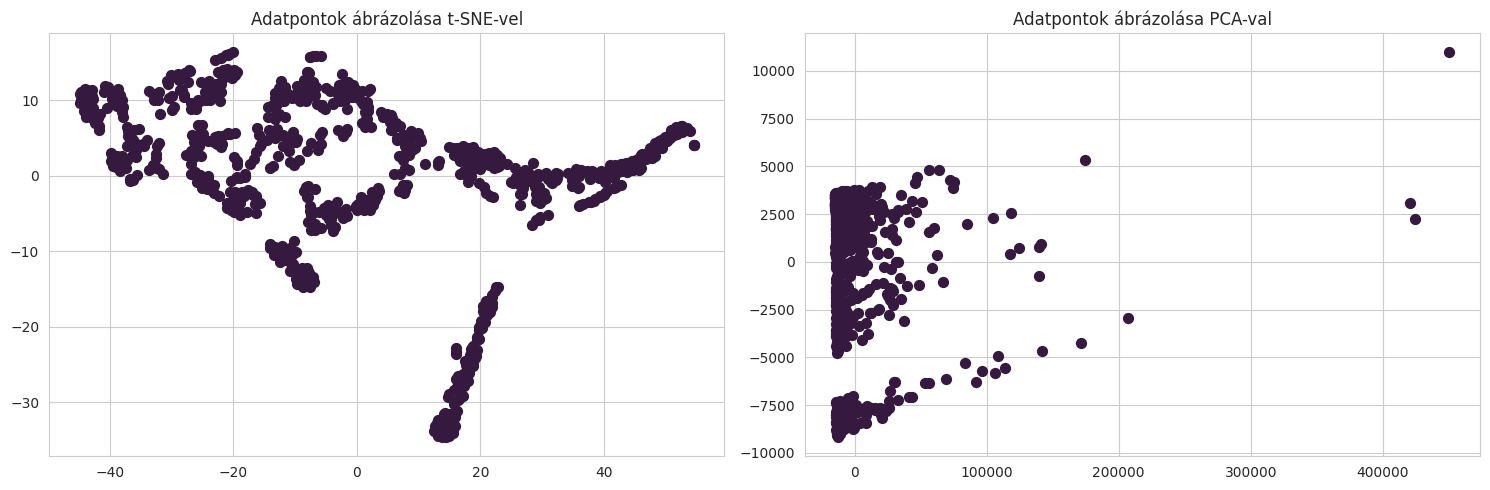

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], s=50, cmap=c_palette)
axes[0].set_title('Adatpontok ábrázolása t-SNE-vel')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], s=50, cmap=c_palette)
axes[1].set_title('Adatpontok ábrázolása PCA-val')

plt.tight_layout()
plt.show()

After creating the clusters, we will determine which clustering method is easier to interpret and visualize.

### **K-Means Clustering**

First, we need to determine the optimal number of clusters. We will establish that there should be at least 3 customer groups, but no more than 10, as managing more than this would be challenging from a marketing strategy perspective, especially since only two people in the marketing department are handling this. Therefore, we will choose a number of clusters between 3 and 10.

**Silhouette score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

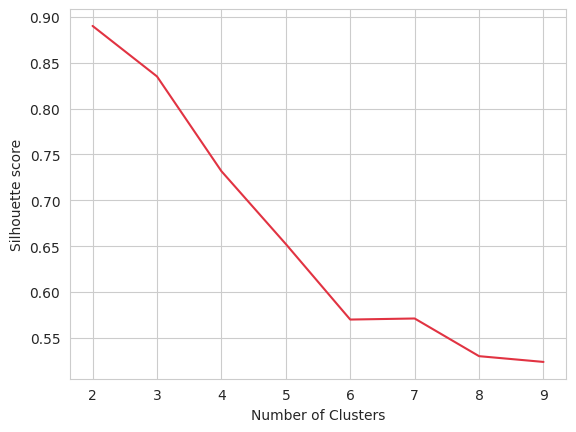

In [120]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(merged_data)
    silhouette_scores.append(silhouette_score(merged_data, cluster_labels))
plt.plot(range(2, 10), silhouette_scores, color=palette[3])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

**Elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

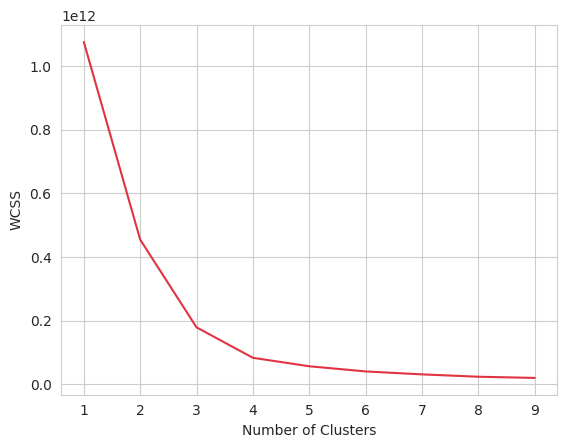

In [119]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(merged_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, color=palette[3])
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the two charts, we can observe that overall, dividing into 4 clusters would provide the most accurate customer segments for the company.

In [121]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(merged_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We will visualize the clusters using the Matplotlib library, and also create interactive plots with Plotly to enhance the interactivity.








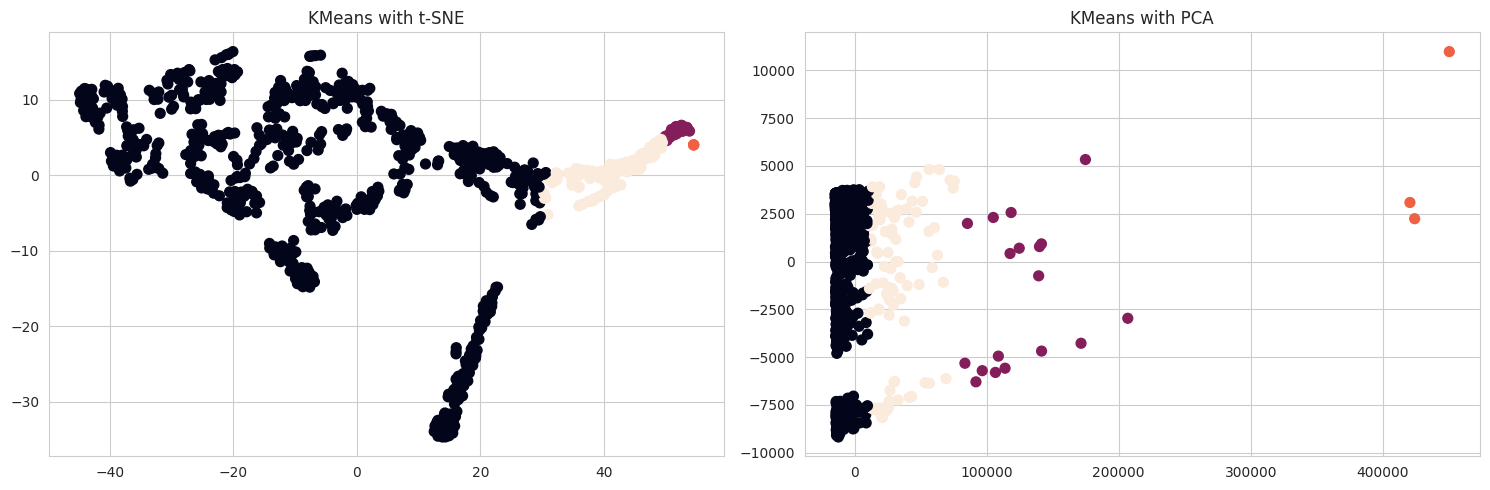

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_kmeans, s=50, cmap=c_palette)
axes[0].set_title('KMeans with t-SNE')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, s=50, cmap=c_palette)
axes[1].set_title('KMeans with PCA')

plt.tight_layout()
plt.show()

In [123]:
hover_labels = labels.apply(lambda row: ', '.join([f'{col}: {val}' for col, val in row.items()]), axis=1).tolist()

In [124]:
import plotly.express as px
from matplotlib.colors import rgb2hex

temp = pd.DataFrame({
    'tsne_1': data_tsne[:, 0],
    'tsne_2': data_tsne[:, 1],
    'cluster': y_kmeans,
    'hover_label': hover_labels
})

temp['cluster'] = temp['cluster'].astype(str)

hex_palette = [rgb2hex(color) for color in palette]

custom_cmap = {
    '0': hex_palette[1],
    '1': hex_palette[2],
    '2': hex_palette[3],
    '3': hex_palette[4]
}

In [125]:
fig = px.scatter(
    temp,
    x='tsne_1',
    y='tsne_2',
    color='cluster',
    hover_name='hover_label',
    color_discrete_map=custom_cmap
)

fig.update_traces(hovertemplate='%{hovertext}')
fig.show()

In [126]:
temp2 = pd.DataFrame({
    'pca_1': data_pca[:, 0],
    'pca_2': data_pca[:, 1],
    'cluster': y_kmeans,
    'hover_label': hover_labels
})

temp2['cluster'] = temp2['cluster'].astype(str)

hex_palette = [rgb2hex(color) for color in palette]

custom_cmap = {
    '0': hex_palette[1],
    '1': hex_palette[2],
    '2': hex_palette[3],
    '3': hex_palette[4]
}

In [127]:
fig = px.scatter(
    temp2,
    x='pca_1',
    y='pca_2',
    color='cluster',
    hover_name='hover_label',
    color_discrete_map=custom_cmap
)

fig.update_traces(hovertemplate='%{hovertext}')
fig.show()

In [128]:
y_kmeansd = pd.DataFrame(y_kmeans)
y_kmeansd.columns = ['Cluster']
groups = pd.concat([labels, y_kmeansd], axis=1)

Using the table and the charts below, we can browse through the members of the different customer groups.

In [129]:
groups[groups['Cluster'] == 0]

PartnerId  RFM_Score        Customer_segment          City  \
0            4       1.84  Less Important Clients        BRASOV   
2          124       2.90  Less Important Clients        BRASOV   
3          125       0.58            Lost Clients        BRASOV   
4          142       2.00  Less Important Clients    SIGHISOARA   
5          143       3.97         Neutral Clients        BRASOV   
..         ...        ...                     ...           ...   
801      12801       1.16            Lost Clients  MOSNITA NOUA   
802      12802       1.16            Lost Clients       BECLEAN   
803      12807       1.94  Less Important Clients  BAIA DE FIER   
804      12809       1.20            Lost Clients   CLUJ NAPOCA   
805      12812       1.23            Lost Clients       CRAIOVA   

    EarliestDocument LatestDocument  DaysBetween    SalesMean  SalesSum  \
0         2022-08-24     2022-12-14          112   702.400000   1404.80   
2         2022-01-14     2022-11-07          297   300.858571   2106.01   
3         2022-03-21     2022-03-21            0   445.000000    445.00   
4         2022-04-26     2022-10-17          174   397.806667   1193.42   
5         2022-01-04     2022-12-29          359   665.690714   9319.67   
..               ...            ...          ...          ...       ...   
801       2022-12-21     2022-12-21            0    76.010000     76.01   
802       2022-12-21     2022-12-21            0   810.510000    810.51   
803       2022-12-22     2022-12-22            0  1932.650000   3865.30   
804       2022-12-27     2022-12-27            0   323.530000    323.53   
805       2022-12-28     2022-12-28            0   131.820000    131.82   

    Quarter  Cluster  
0    2022Q3        0  
2    2022Q1        0  
3    2022Q1        0  
4    2022Q2        0  
5    2022Q3        0  
..      ...      ...  
801  2022Q4        0  
802  2022Q4        0  
803  2022Q4        0  
804  2022Q4        0  
805  2022Q4        0  

[694 rows x 11 columns]

In [130]:
groups[groups['Cluster'] == 1]

PartnerId  RFM_Score  Customer_segment               City  \
9          162       4.92      Best Clients             SOVATA   
10         193       4.58      Best Clients          TIMISOARA   
17         316       4.96      Best Clients          TIMISOARA   
20         342       4.77      Best Clients     MIERCUREA CIUC   
37         524       4.90      Best Clients       PIATRA NEAMT   
40         554       4.98      Best Clients            CRAIOVA   
48         650       4.49  Valuable Clients          PETROSANI   
93        1106       4.90      Best Clients            SUCEAVA   
112       1387       4.80      Best Clients        CLUJ NAPOCA   
133       4518       4.82      Best Clients          TARGU JIU   
180       6027       4.84      Best Clients          TIMISOARA   
184       6130       4.85      Best Clients  CLUJ Unknown City   
188       6246       4.88      Best Clients          TARGU JIU   
194       6326       4.52      Best Clients          TIMISOARA   
271       8362       4.83      Best Clients         CARANSEBES   
277       8456       4.89      Best Clients             SINAIA   
282       8655       4.98      Best Clients     MIERCUREA CIUC   
324       9676       4.84      Best Clients       MOLDOVA NOUA   

    EarliestDocument LatestDocument  DaysBetween    SalesMean   SalesSum  \
9         2022-01-04     2022-12-27          357  1216.920093  131427.37   
10        2022-02-01     2022-12-19          321  1976.872105   75121.14   
17        2022-01-03     2022-12-28          359   551.989097   85558.31   
20        2022-01-03     2022-12-19          350  1296.181429   90732.70   
37        2022-01-07     2022-12-27          354  1345.041098  110293.37   
40        2022-01-03     2022-12-30          361  1326.078220  156477.23   
48        2022-01-11     2022-12-22          345  2616.808333   78504.25   
93        2022-01-03     2022-12-28          359  1227.491972   87151.93   
112       2022-01-05     2022-12-22          351  1214.727719   69239.48   
133       2022-01-03     2022-12-19          350  1007.468704  108806.62   
180       2022-01-06     2022-12-23          351  1655.506515  109263.43   
184       2022-01-25     2022-12-27          336  1838.718000  110323.08   
188       2022-01-05     2022-12-22          351   954.178265   93509.47   
194       2022-01-20     2022-12-27          341  3280.757667   98422.73   
271       2022-01-10     2022-12-28          352  1775.577547   94105.61   
277       2022-01-04     2022-12-27          357  1174.602778   84571.40   
282       2022-01-05     2022-12-29          358   439.281988   70724.40   
324       2022-01-03     2022-12-27          358  2309.360172  133942.89   

    Quarter  Cluster  
9    2022Q2        1  
10   2022Q2        1  
17   2022Q1        1  
20   2022Q1        1  
37   2022Q3        1  
40   2022Q4        1  
48   2022Q1        1  
93   2022Q1        1  
112  2022Q3        1  
133  2022Q3        1  
180  2022Q3        1  
184  2022Q1        1  
188  2022Q1        1  
194  2022Q2        1  
271  2022Q2        1  
277  2022Q3        1  
282  2022Q2        1  
324  2022Q1        1

In [131]:
groups[groups['Cluster'] == 2]

PartnerId  RFM_Score Customer_segment         City EarliestDocument  \
1          113       4.69     Best Clients          DEJ       2022-01-06   
92        1098       4.97     Best Clients    BUCURESTI       2022-01-03   
267       8191       4.78     Best Clients  TARGU MURES       2022-01-05   

    LatestDocument  DaysBetween    SalesMean   SalesSum Quarter  Cluster  
1       2022-12-20          348  6891.433333  310114.50  2022Q2        2  
92      2022-12-28          359   776.868359  307639.87  2022Q3        2  
267     2022-12-19          348  4567.217083  328839.63  2022Q3        2

In [132]:
groups[groups['Cluster'] == 3]

PartnerId  RFM_Score  Customer_segment            City EarliestDocument  \
8          161       4.48  Valuable Clients          BRASOV       2022-01-14   
14         281       3.26   Neutral Clients       BUCURESTI       2022-03-14   
26         442       4.55      Best Clients           TURDA       2022-01-03   
35         505       4.38  Valuable Clients         FOCSANI       2022-02-21   
41         564       4.55      Best Clients     TARGU MURES       2022-01-10   
..         ...        ...               ...             ...              ...   
579      12083       4.86      Best Clients  MIERCUREA CIUC       2022-01-03   
619      12215       4.67      Best Clients           BEIUS       2022-02-28   
630      12247       4.29  Valuable Clients          BRASOV       2022-03-21   
644      12279       4.56      Best Clients          BRASOV       2022-04-04   
689      12424       3.97   Neutral Clients        MOINESTI       2022-06-08   

    LatestDocument  DaysBetween    SalesMean  SalesSum Quarter  Cluster  
8       2022-12-08          328   675.157027  24980.81  2022Q3        3  
14      2022-11-28          259  2717.640000  24458.76  2022Q2        3  
26      2022-12-19          350   775.891143  27156.19  2022Q1        3  
35      2022-12-19          301   934.858966  27110.91  2022Q3        3  
41      2022-12-19          343   809.785714  28342.50  2022Q2        3  
..             ...          ...          ...       ...     ...      ...  
579     2022-12-27          358   640.333088  43542.65  2022Q3        3  
619     2022-12-27          302  1359.972973  50319.00  2022Q2        3  
630     2022-12-20          274   832.549167  19981.18  2022Q4        3  
644     2022-12-27          267   767.029677  23777.92  2022Q2        3  
689     2022-11-23          168   994.242000  19884.84  2022Q3        3  

[91 rows x 11 columns]

### ****Hierarchical Clustering****

For this model, we also need to determine the optimal number of clusters, this time using a dendrogram. We still aim to keep the number of clusters between 3 and 10.

**Dendogram**

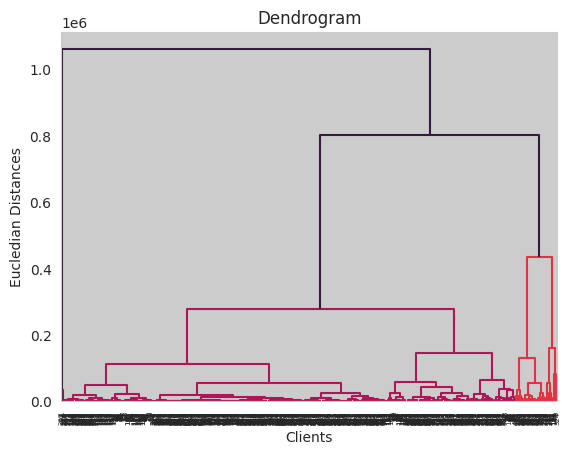

In [133]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(merged_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clients')
plt.ylabel('Eucledian Distances')
plt.show()

For this model, we can also choose 4 clusters.

In [134]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(merged_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



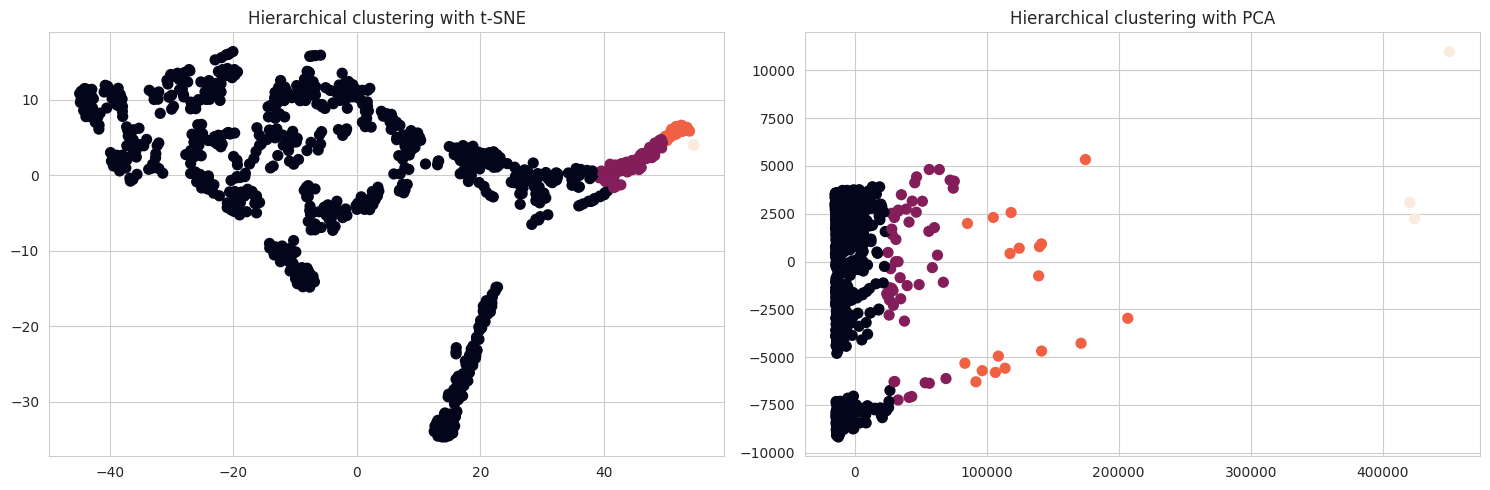

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_hc, s=50, cmap=c_palette)
axes[0].set_title('Hierarchical clustering with t-SNE')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_hc, s=50, cmap=c_palette)
axes[1].set_title('Hierarchical clustering with PCA')

plt.tight_layout()
plt.show()

In [136]:
temp = pd.DataFrame({
    'tsne_1': data_tsne[:, 0],
    'tsne_2': data_tsne[:, 1],
    'cluster': y_hc,
    'hover_label': hover_labels
})

temp['cluster'] = temp['cluster'].astype(str)

hex_palette = [rgb2hex(color) for color in palette]

custom_cmap = {
    '0': hex_palette[1],
    '1': hex_palette[2],
    '2': hex_palette[3],
    '3': hex_palette[4]
}

In [137]:
fig = px.scatter(
    temp,
    x='tsne_1',
    y='tsne_2',
    color='cluster',
    hover_name='hover_label',
    color_discrete_map=custom_cmap
)

fig.update_traces(hovertemplate='%{hovertext}')
fig.show()

In [138]:
temp2 = pd.DataFrame({
    'pca_1': data_pca[:, 0],
    'pca_2': data_pca[:, 1],
    'cluster': y_hc,
    'hover_label': hover_labels
})

temp2['cluster'] = temp2['cluster'].astype(str)

hex_palette = [rgb2hex(color) for color in palette]

custom_cmap = {
    '0': hex_palette[1],
    '1': hex_palette[2],
    '2': hex_palette[3],
    '3': hex_palette[4]
}

In [139]:
fig = px.scatter(
    temp2,
    x='pca_1',
    y='pca_2',
    color='cluster',
    hover_name='hover_label',
    color_discrete_map=custom_cmap
)

fig.update_traces(hovertemplate='%{hovertext}')
fig.show()

In [140]:
y_hcd = pd.DataFrame(y_hc)
y_hcd.columns = ['Cluster']
groups2 = pd.concat([labels, y_hcd], axis=1)

In [141]:
groups2[groups2['Cluster'] == 0]

PartnerId  RFM_Score        Customer_segment          City  \
0            4       1.84  Less Important Clients        BRASOV   
2          124       2.90  Less Important Clients        BRASOV   
3          125       0.58            Lost Clients        BRASOV   
4          142       2.00  Less Important Clients    SIGHISOARA   
5          143       3.97         Neutral Clients        BRASOV   
..         ...        ...                     ...           ...   
801      12801       1.16            Lost Clients  MOSNITA NOUA   
802      12802       1.16            Lost Clients       BECLEAN   
803      12807       1.94  Less Important Clients  BAIA DE FIER   
804      12809       1.20            Lost Clients   CLUJ NAPOCA   
805      12812       1.23            Lost Clients       CRAIOVA   

    EarliestDocument LatestDocument  DaysBetween    SalesMean  SalesSum  \
0         2022-08-24     2022-12-14          112   702.400000   1404.80   
2         2022-01-14     2022-11-07          297   300.858571   2106.01   
3         2022-03-21     2022-03-21            0   445.000000    445.00   
4         2022-04-26     2022-10-17          174   397.806667   1193.42   
5         2022-01-04     2022-12-29          359   665.690714   9319.67   
..               ...            ...          ...          ...       ...   
801       2022-12-21     2022-12-21            0    76.010000     76.01   
802       2022-12-21     2022-12-21            0   810.510000    810.51   
803       2022-12-22     2022-12-22            0  1932.650000   3865.30   
804       2022-12-27     2022-12-27            0   323.530000    323.53   
805       2022-12-28     2022-12-28            0   131.820000    131.82   

    Quarter  Cluster  
0    2022Q3        0  
2    2022Q1        0  
3    2022Q1        0  
4    2022Q2        0  
5    2022Q3        0  
..      ...      ...  
801  2022Q4        0  
802  2022Q4        0  
803  2022Q4        0  
804  2022Q4        0  
805  2022Q4        0  

[735 rows x 11 columns]

In [142]:
groups2[groups2['Cluster'] == 1]

PartnerId  RFM_Score  Customer_segment                   City  \
52         689       4.52      Best Clients              TIMISOARA   
53         690       4.80      Best Clients                 SOVATA   
63         780       4.74      Best Clients                OTOPENI   
74         954       4.79      Best Clients                   ARAD   
83        1035       4.73      Best Clients                OTOPENI   
96        1141       4.61      Best Clients                GHIRODA   
123       1804       4.50  Valuable Clients              TIMISOARA   
124       1809       4.81      Best Clients                 BRASOV   
138       4775       4.59      Best Clients           MOSNITA NOUA   
152       5390       4.60      Best Clients            TARGU MURES   
168       5820       4.46  Valuable Clients              BUCURESTI   
179       6015       4.55      Best Clients            TARGU MURES   
181       6050       4.83      Best Clients      ODORHEIU SECUIESC   
186       6173       4.60      Best Clients              TIMISOARA   
198       6387       3.95   Neutral Clients                  BICAZ   
199       6437       3.91   Neutral Clients              TIMISOARA   
204       6557       4.74      Best Clients             DUMBRAVITA   
206       6573       4.43  Valuable Clients                  JIBOU   
207       6588       4.07  Valuable Clients                CRAIOVA   
211       6727       4.64      Best Clients         TARGU SECUIESC   
216       6805       4.52      Best Clients            TARGU MURES   
227       7021       4.52      Best Clients                BECLEAN   
231       7128       4.66      Best Clients                FOCSANI   
246       7569       4.39  Valuable Clients              TIMISOARA   
257       7779       3.90   Neutral Clients                MARGINA   
262       7998       3.78   Neutral Clients              TARGU JIU   
265       8042       3.73   Neutral Clients              TIMISOARA   
285       8682       4.38  Valuable Clients          TIMISU DE JOS   
298       8992       4.71      Best Clients               BISTRITA   
302       9080       4.53      Best Clients                 ZABALA   
307       9214       4.73      Best Clients      ODORHEIU SECUIESC   
314       9541       4.14  Valuable Clients      ODORHEIU SECUIESC   
336       9833       4.58      Best Clients         MIERCUREA CIUC   
339       9866       4.72      Best Clients           MOSNITA NOUA   
364      10236       4.48  Valuable Clients             CARANSEBES   
370      10387       4.28  Valuable Clients              CAMPULUNG   
392      10599       4.80      Best Clients                FAGARAS   
394      10634       4.20  Valuable Clients               ZARNESTI   
396      10648       3.41   Neutral Clients           NEGRESTI OAS   
399      10691       4.60      Best Clients            TARGU MURES   
400      10696       4.27  Valuable Clients        SANNICOLAU MARE   
408      10771       4.83      Best Clients                  TURDA   
424      10899       4.81      Best Clients            TARGU MURES   
445      11119       4.91      Best Clients                   ARAD   
461      11255       4.85      Best Clients                 HARLAU   
482      11444       4.58      Best Clients  DROBETA TURNU SEVERIN   
533      11797       4.06  Valuable Clients              TIMISOARA   
564      11999       3.85   Neutral Clients                 GALATI   
579      12083       4.86      Best Clients         MIERCUREA CIUC   
619      12215       4.67      Best Clients                  BEIUS   

    EarliestDocument LatestDocument  DaysBetween    SalesMean  SalesSum  \
52        2022-01-06     2022-12-21          349  1269.998065  39369.94   
53        2022-01-10     2022-12-27          351   783.558077  40745.02   
63        2022-01-05     2022-12-13          342   440.040263  33443.06   
74        2022-04-14     2022-12-28          258  1257.218936  59089.29   
83        2022-01-25     2022-12-28          337  1286.6010

In [143]:
groups2[groups2['Cluster'] == 2]

PartnerId  RFM_Score  Customer_segment               City  \
9          162       4.92      Best Clients             SOVATA   
10         193       4.58      Best Clients          TIMISOARA   
17         316       4.96      Best Clients          TIMISOARA   
20         342       4.77      Best Clients     MIERCUREA CIUC   
37         524       4.90      Best Clients       PIATRA NEAMT   
40         554       4.98      Best Clients            CRAIOVA   
48         650       4.49  Valuable Clients          PETROSANI   
93        1106       4.90      Best Clients            SUCEAVA   
112       1387       4.80      Best Clients        CLUJ NAPOCA   
133       4518       4.82      Best Clients          TARGU JIU   
180       6027       4.84      Best Clients          TIMISOARA   
184       6130       4.85      Best Clients  CLUJ Unknown City   
188       6246       4.88      Best Clients          TARGU JIU   
194       6326       4.52      Best Clients          TIMISOARA   
271       8362       4.83      Best Clients         CARANSEBES   
277       8456       4.89      Best Clients             SINAIA   
282       8655       4.98      Best Clients     MIERCUREA CIUC   
324       9676       4.84      Best Clients       MOLDOVA NOUA   

    EarliestDocument LatestDocument  DaysBetween    SalesMean   SalesSum  \
9         2022-01-04     2022-12-27          357  1216.920093  131427.37   
10        2022-02-01     2022-12-19          321  1976.872105   75121.14   
17        2022-01-03     2022-12-28          359   551.989097   85558.31   
20        2022-01-03     2022-12-19          350  1296.181429   90732.70   
37        2022-01-07     2022-12-27          354  1345.041098  110293.37   
40        2022-01-03     2022-12-30          361  1326.078220  156477.23   
48        2022-01-11     2022-12-22          345  2616.808333   78504.25   
93        2022-01-03     2022-12-28          359  1227.491972   87151.93   
112       2022-01-05     2022-12-22          351  1214.727719   69239.48   
133       2022-01-03     2022-12-19          350  1007.468704  108806.62   
180       2022-01-06     2022-12-23          351  1655.506515  109263.43   
184       2022-01-25     2022-12-27          336  1838.718000  110323.08   
188       2022-01-05     2022-12-22          351   954.178265   93509.47   
194       2022-01-20     2022-12-27          341  3280.757667   98422.73   
271       2022-01-10     2022-12-28          352  1775.577547   94105.61   
277       2022-01-04     2022-12-27          357  1174.602778   84571.40   
282       2022-01-05     2022-12-29          358   439.281988   70724.40   
324       2022-01-03     2022-12-27          358  2309.360172  133942.89   

    Quarter  Cluster  
9    2022Q2        2  
10   2022Q2        2  
17   2022Q1        2  
20   2022Q1        2  
37   2022Q3        2  
40   2022Q4        2  
48   2022Q1        2  
93   2022Q1        2  
112  2022Q3        2  
133  2022Q3        2  
180  2022Q3        2  
184  2022Q1        2  
188  2022Q1        2  
194  2022Q2        2  
271  2022Q2        2  
277  2022Q3        2  
282  2022Q2        2  
324  2022Q1        2

In [144]:
groups2[groups2['Cluster'] == 3]

PartnerId  RFM_Score Customer_segment         City EarliestDocument  \
1          113       4.69     Best Clients          DEJ       2022-01-06   
92        1098       4.97     Best Clients    BUCURESTI       2022-01-03   
267       8191       4.78     Best Clients  TARGU MURES       2022-01-05   

    LatestDocument  DaysBetween    SalesMean   SalesSum Quarter  Cluster  
1       2022-12-20          348  6891.433333  310114.50  2022Q2        3  
92      2022-12-28          359   776.868359  307639.87  2022Q3        3  
267     2022-12-19          348  4567.217083  328839.63  2022Q3        3

### **DBSCAN Clustering**

With the DBSCAN algorithm, you do not need to predefine the number of clusters; the model determines it automatically.

In [145]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
y_dbscan = dbscan.fit_predict(merged_data)

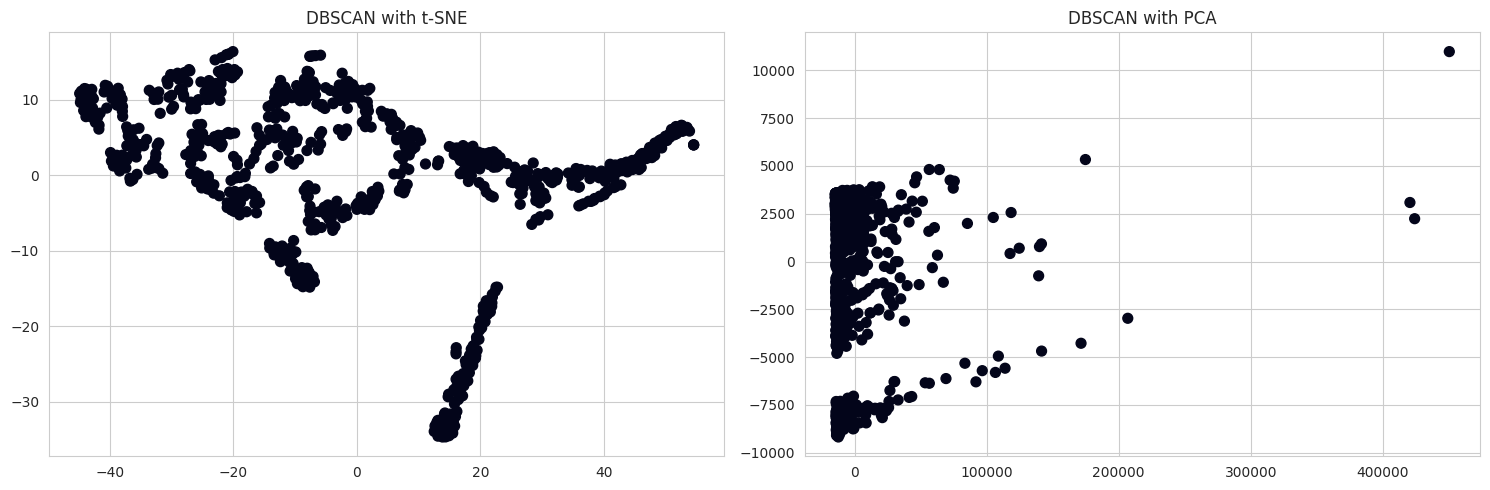

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_dbscan, s=50, cmap=c_palette)
axes[0].set_title('DBSCAN with t-SNE')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_dbscan, s=50, cmap=c_palette)
axes[1].set_title('DBSCAN with PCA')

plt.tight_layout()
plt.show()

Despite various hyperparameter tuning adjustments, the model did not produce interpretable clusters, leading to the conclusion that DBSCAN does not work well for this dataset.

### **Spectral klaszterezés**

**Silhouette score**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning:

Graph is no

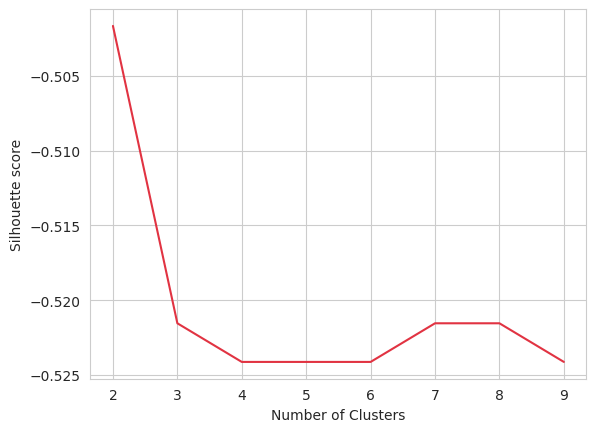

In [147]:
from sklearn.cluster import SpectralClustering
silhouette_scores = []
for n_clusters in range(2, 10):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
    cluster_labels = spectral.fit_predict(merged_data)
    silhouette_scores.append(silhouette_score(merged_data, cluster_labels))
plt.plot(range(2, 10), silhouette_scores, color=palette[3])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

Negative scores are not promising; the model will not be able to create meaningful clusters.

### **Gaussian Mixture Model**

**Silhouette score**

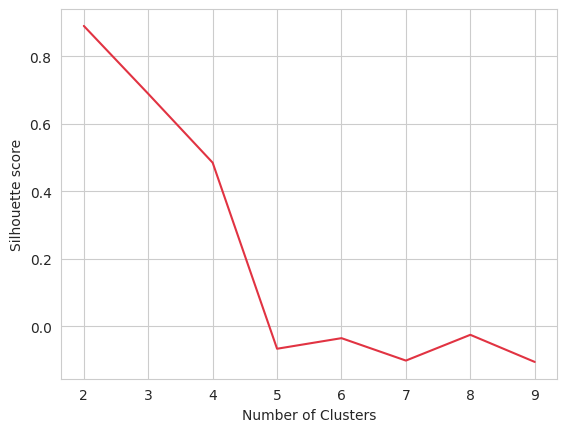

In [148]:
from sklearn.mixture import GaussianMixture
silhouette_scores = []
for n_clusters in range(2, 10):
    gauss = GaussianMixture(n_components=n_clusters)
    cluster_labels = gauss.fit_predict(merged_data)
    silhouette_scores.append(silhouette_score(merged_data, cluster_labels))
plt.plot(range(2, 10), silhouette_scores, color=palette[3])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

As the final model, we will also test the Gaussian Mixture Model with 3 components.

In [149]:
gauss = GaussianMixture(n_components=3)
y_gauss = gauss.fit_predict(merged_data)

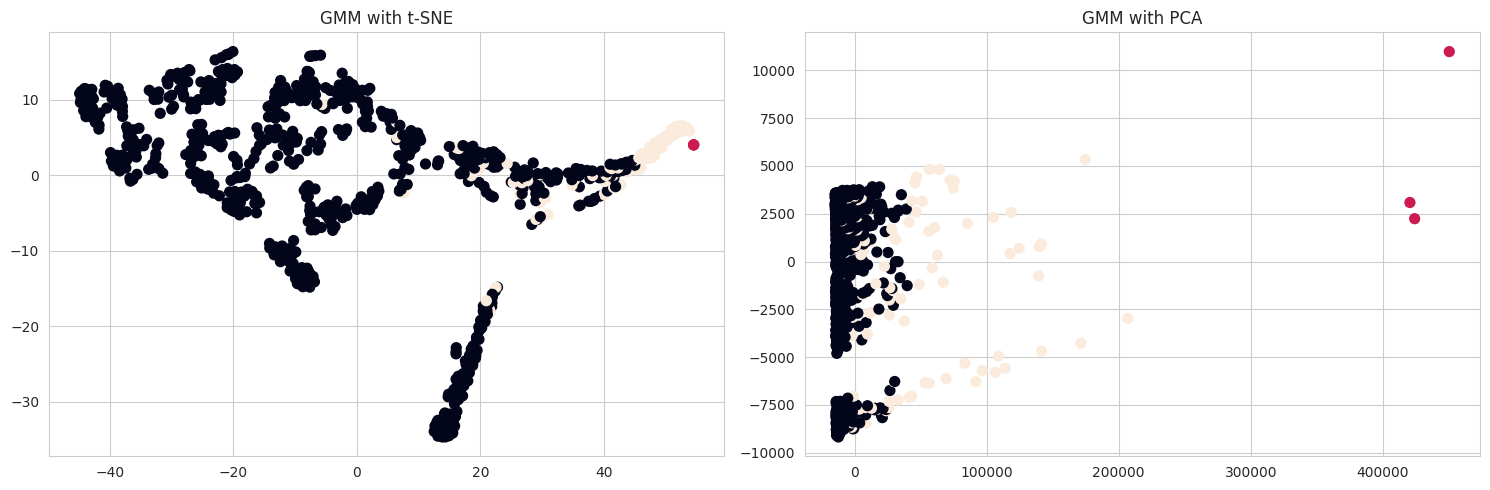

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_gauss, s=50, cmap=c_palette)
axes[0].set_title('GMM with t-SNE')

axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_gauss, s=50, cmap=c_palette)
axes[1].set_title('GMM with PCA')

plt.tight_layout()
plt.show()

The clusters do not form well-separated groups.

## **Model Selection and Evaluation**

Based on the results of the modeling process, we can conclude that the **Hierarchical Clustering algorithm** produced the best groups, with **4 clusters** being the optimal number.

**Summary of the Data Cleaning Process:**

* Overview of Database Basic Features
* Check for Duplicate Rows
* Column-wise Checks and Corrections
* Relevant Visualizations for Dimensions

Chosen Algorithm: **Hierarchical Clustering**

Optimal Number of Clusters: **4 clusters**

**Reasons for Choosing Hierarchical Clustering:**

* The clusters are distinctly separated and well-defined, making it easier to interpret and analyze them.
* Hierarchical clustering avoids creating excessively large clusters, which was a problem with K-Means. In K-Means, 5 clusters would not have been optimal according to the metrics.
* Members within each cluster are similar to each other in various aspects, indicating that the algorithm performed well in grouping similar data points.

**Advantages:**

* The dendrogram offers a visual representation that helps in identifying the optimal number of clusters, providing insight into the data structure.
* Hierarchical clustering is relatively straightforward to implement and does not require complex parameter tuning or iterative optimization processes.
* It works efficiently with small to medium-sized datasets, where detailed analysis and visualization are feasible.

**Disadvantages:**

* Scalability Issues - Hierarchical clustering can be computationally and memory intensive, which may pose challenges with larger datasets.
* Determining the appropriate cutting point for the dendrogram can be subjective and may require domain knowledge or additional validation techniques.
* It may not be effective for datasets that lack a hierarchical structure or where clusters are not well-separated.




### **Interpretation and Description of Clusters + Suggested Marketing Strategies**

In [152]:
groups2[groups2['Cluster'] == 0].head()

PartnerId  RFM_Score        Customer_segment        City EarliestDocument  \
0          4       1.84  Less Important Clients      BRASOV       2022-08-24   
2        124       2.90  Less Important Clients      BRASOV       2022-01-14   
3        125       0.58            Lost Clients      BRASOV       2022-03-21   
4        142       2.00  Less Important Clients  SIGHISOARA       2022-04-26   
5        143       3.97         Neutral Clients      BRASOV       2022-01-04   

  LatestDocument  DaysBetween   SalesMean  SalesSum Quarter  Cluster  
0     2022-12-14          112  702.400000   1404.80  2022Q3        0  
2     2022-11-07          297  300.858571   2106.01  2022Q1        0  
3     2022-03-21            0  445.000000    445.00  2022Q1        0  
4     2022-10-17          174  397.806667   1193.42  2022Q2        0  
5     2022-12-29          359  665.690714   9319.67  2022Q3        0

**Cluster 0:** Occasional Clients

**Description:** This cluster includes clients who have made only one or a few purchases, and those purchases were for small amounts. They have a low FRM score and do not significantly contribute to the company's value growth.

**Suggested Strategy:** Approach them with compelling and attractive marketing strategies. Since they are less familiar with the company, it is important to showcase the benefits and advantages of becoming loyal customers.

In [153]:
groups2[groups2['Cluster'] == 1].head()

PartnerId  RFM_Score Customer_segment       City EarliestDocument  \
52        689       4.52     Best Clients  TIMISOARA       2022-01-06   
53        690       4.80     Best Clients     SOVATA       2022-01-10   
63        780       4.74     Best Clients    OTOPENI       2022-01-05   
74        954       4.79     Best Clients       ARAD       2022-04-14   
83       1035       4.73     Best Clients    OTOPENI       2022-01-25   

   LatestDocument  DaysBetween    SalesMean  SalesSum Quarter  Cluster  
52     2022-12-21          349  1269.998065  39369.94  2022Q2        1  
53     2022-12-27          351   783.558077  40745.02  2022Q4        1  
63     2022-12-13          342   440.040263  33443.06  2022Q3        1  
74     2022-12-28          258  1257.218936  59089.29  2022Q3        1  
83     2022-12-28          337  1286.601026  50177.44  2022Q4        1


**Cluster 1:** Regular Clients

**Description:** This group includes both valuable and neutral clients. They make relatively frequent purchases, have a medium total purchase value, and an FRM score around 4.

**Suggested Strategy:** It is advisable to combine personalized offers with general new customer acquisition strategies. Given that there are too many clients in this group for fully personalized treatment, a balanced approach will be more effective.

In [154]:
groups2[groups2['Cluster'] == 2].head()

PartnerId  RFM_Score Customer_segment            City EarliestDocument  \
9         162       4.92     Best Clients          SOVATA       2022-01-04   
10        193       4.58     Best Clients       TIMISOARA       2022-02-01   
17        316       4.96     Best Clients       TIMISOARA       2022-01-03   
20        342       4.77     Best Clients  MIERCUREA CIUC       2022-01-03   
37        524       4.90     Best Clients    PIATRA NEAMT       2022-01-07   

   LatestDocument  DaysBetween    SalesMean   SalesSum Quarter  Cluster  
9      2022-12-27          357  1216.920093  131427.37  2022Q2        2  
10     2022-12-19          321  1976.872105   75121.14  2022Q2        2  
17     2022-12-28          359   551.989097   85558.31  2022Q1        2  
20     2022-12-19          350  1296.181429   90732.70  2022Q1        2  
37     2022-12-27          354  1345.041098  110293.37  2022Q3        2

**Cluster 2:** Loyal Clients

**Description:** Clients in this group have made purchases throughout the entire year, spending large amounts with the company. They also have high FRM scores.

**Suggested Strategy:** It is crucial to manage these clients with special attention and implement customer retention strategies. While they are already loyal, it is beneficial to maintain a good business relationship with them through discounts and personalized offers.

In [155]:
groups2[groups2['Cluster'] == 3].head()

PartnerId  RFM_Score Customer_segment         City EarliestDocument  \
1          113       4.69     Best Clients          DEJ       2022-01-06   
92        1098       4.97     Best Clients    BUCURESTI       2022-01-03   
267       8191       4.78     Best Clients  TARGU MURES       2022-01-05   

    LatestDocument  DaysBetween    SalesMean   SalesSum Quarter  Cluster  
1       2022-12-20          348  6891.433333  310114.50  2022Q2        3  
92      2022-12-28          359   776.868359  307639.87  2022Q3        3  
267     2022-12-19          348  4567.217083  328839.63  2022Q3        3

**Cluster 3:** Top Clients

**Description:** This group includes the top 3 clients of the company who have made the highest overall purchases. They have consistently bought throughout the entire year and have a high, nearly perfect FRM score.

**Suggested Strategy:** These are the most active and loyal clients, so maintaining personal contact with them is crucial. Offering loyalty-based promotions, and ensuring their personalized needs are met, will help in maintaining a strong business relationship.

**Summary Analysis:**

* **Seasonality:** The diversity in peak dates suggests that the products are not seasonal, so there is no need to focus specifically on certain periods for sales and advertising.

* **Top Locations:** Most of the frequent buyers are based in Transylvania (+ Bucharest, which is also very important).

* **Revenue Trends:** Revenue significantly increased in the first three quarters of the year but declined towards the end of the year. If this decline is seasonal, a new strategy could be developed for this period. However, if the decline continues beyond this period, it might be necessary to increase customer interactions and strengthen customer relationships (noted that the decline began around October).

* **High Spending Cities:** The highest spending comes from Bucharest, with other major cities also showing high spending levels. It would be beneficial to reach more people in similar cities, as they are more willing to spend.

* **Customer Focus:** There is a strong correlation between frequent buyers and high spending. Therefore, focusing on converting more customers into regular ones and offering new promotions to existing customers is advisable.

* **Re-engagement Strategy:** There are many less important and neutral clients. It is crucial to re-engage with them to identify those who might become active buyers again.